<a href="https://colab.research.google.com/github/EdFlo15/Fake_news_Detection_on_Twitter/blob/main/Fake_News_Detection_On_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto de Grado**

**Título:** Modelo para la detección de noticias falsas en formato texto en la red social Twitter, aplicado al contexto político colombiano de las elecciones presidenciales de 2022.

----Version Final----

**Integrantes:**
* Jesus Eduardo Flores Q.
* Juan Gabriel Montaño M.

#**Instalaciones**

In [ ]:
!pip install tweepy
!pip3 install tqdm
!pip install spacy
!pip install matplotlib
!pip install wordcloud
!pip install unidecode
!pip install scikit-plot
!pip install bayesian-optimization
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
!pip install stop-words

#Instalacion de librerias para extracción de URLs y Webscrapping
!pip install beautifulsoup4
!pip install requests
!pip install URLExtract

# paquetes necesarios para trabajar con BERT
!pip install -q -U "tensorflow-text==2.8.*"
!pip install -q tf-models-official==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 6.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=375bc5581ebb75b0318ed18da267bdff9922

In [ ]:
# librerias y versiones utilziadas en el proyexto
!pip freeze

absl-py==1.1.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.1
backcall==0.2.0
bayesian-optimization==1.2.0
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2022.5.18.1
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.5
cmdstanpy==0.9.5
colorama==0.4.4
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.30
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator

#**Librerias**

In [ ]:
import io
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np
import string
import tweepy
from tqdm.notebook import tqdm as tqdm_notebook
from dateutil import tz
from datetime import datetime 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import unidecode
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import requests
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
from google.colab import (
    drive,
    files
)
from tqdm import tqdm
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from stop_words import get_stop_words
import pickle
import xgboost as xgb
from sklearn.linear_model import PassiveAggressiveClassifier
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

#### 
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # creacion AdamW optimizer

## libreria para descargar un .zip desde una url de descarga
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
import os

#Libreria display tabla
from IPython.display import display

#Librerias extracción URLs y webscrapping
import requests
from bs4 import BeautifulSoup
from urlextract import URLExtract
from urllib.parse import urlparse


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#**Funciones**

In [ ]:
#Seed para hacer reproducibles los resultados
np.random.seed(42)
rng = np.random.RandomState(1)

In [ ]:
# al llamar la función y pasarle una URL, descarga el arhcivo que debe estar en formato .zip y lo descomprime en la ruta content de colab
def download_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

In [ ]:
#Funcion que convierte el formato de la fecha del tweet en hora GMT -5 Colombia
def convert_date(str_date):
  str_format_date = '%Y-%m-%d %H:%M:%S' 
  from_zone = tz.gettz('UTC')
  to_zone = tz.gettz('America/Bogota')
  date_convert = datetime.strptime(str(str_date), str_format_date)
  date_convert = date_convert.replace(tzinfo=from_zone)
  date_convert = date_convert.astimezone(to_zone)
  date_convert = datetime.strftime(date_convert,'%d/%m/%Y %H:%M:%S')
  return date_convert

In [ ]:
#Funcion para obtener los tweets de un usuario especifico de twitter - Se quitan los ReeTweets
def get_tweets(api,username,items,rts):
  tweets={}
  for tweet in tqdm_notebook(tweepy.Cursor(api.user_timeline, screen_name = username, tweet_mode='extended',include_rts=rts).items(items)):
      tweets[tweet.id]= {
          'full_text': tweet.full_text,
          'created_at': convert_date(tweet.created_at),
          'author_name': tweet.user.name,
          'author_handler': str(tweet.user.screen_name),
          'user_description': tweet.user.description,
          'user_location': tweet.user.location,
          'user_followers_count': tweet.user.followers_count,
          'user_created_at': convert_date(tweet.user.created_at),
          'user_following_count': tweet.user.friends_count,
          'user_verified': tweet.user.verified,
          'lang': tweet.lang,
          'tweet_hashtags': tweet.entities['hashtags'],
          'mention_names': ["@" + d['screen_name'] for d in tweet.entities['user_mentions'] if 'screen_name' in d],
          'mention_ids': [d['id'] for d in tweet.entities['user_mentions'] if 'id' in d],
          'n_retweets': tweet.retweet_count,
          'n_favorites': tweet.favorite_count,
          'is_retweet': hasattr(tweet, 'retweeted_status')
      }
  df_tweets = pd.DataFrame.from_dict(tweets, orient='index')
  df_tweets['id'] = df_tweets.index
  return df_tweets

In [ ]:
 # Remover saltos de linea
def remove_newlines_tabs(text):
  formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ')
  return formatted_text

In [ ]:
# Remover espacios en blanco
def remove_whitespace(text):
    pattern = re.compile(r'\s+') 
    without_whitespace = re.sub(pattern, ' ', text)
    text = without_whitespace.replace(')', ') ')
    text=text.replace("  ", " ").replace("   ", " ").replace("    ", " ").lstrip()
    text=text.replace("  ", " ").replace("   ", " ").replace("    ", " ").rstrip()
    text=text.replace("   ", "")
    return text    

In [ ]:
def accented_characters_removal(text):
  # Remover tildes
    text = unidecode.unidecode(text)
    return text

In [ ]:
def remove_special_characters(text):
    # Remover caracteres especiales
    return text.translate(str.maketrans('','',string.punctuation))

In [ ]:
def lower_text(text):
    # Convertir mayusculas a minusculas
    text = text.lower()
    return text

In [ ]:
stoplist = list(get_stop_words('spanish'))  
nltk_words = list(stopwords.words('spanish')) 
stoplist.extend(nltk_words)
def remove_stopwords(text):
    # Remover stop words
    nostopwords = [word for word in word_tokenize(text) if word.lower() not in stoplist ]
    # Convertir lista en tipo String
    words_string = ' '.join(nostopwords)   
    return words_string

In [ ]:
# función para realizar la lematización del texto con la librería Spacy
nlp = spacy.load('en_core_web_sm')
def lemmatizer(text):  
  doc = nlp(text)
  return ' '.join([word.lemma_ for word in doc])

In [ ]:
def remove_links(text): 
    # Remover urls 
    text=re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+",'',text)
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    text=re.sub(r'opr-littps://S+','',text)
    return text

In [ ]:
def remove_numbers(text):
    # Quitar la palabra NUMBER y number del corpus del contexto mexicano
    formatted_text=''.join((x for x in text if not x.isdigit()))
    formatted_text= re.sub(r"NUMBER", ' ', formatted_text)
    formatted_text= re.sub(r"number", ' ', formatted_text)
    return formatted_text

In [ ]:
# Función que realiza todo el preprocesamiento del texto
def text_preprocessing(text, accented_chars=True, newlines_tabs=True, extra_whitespace=True,lowercase=True,characters_specials=True,stop_words=True,lemmatization = True,links=True,numbers_remove=True):     

    if newlines_tabs == True:  # Remover saltos de linea
        data = remove_newlines_tabs(text) 
   
    if links == True: #remove links
        data = remove_links(data)
        
    if extra_whitespace == True: # Remover espacios en blanco
        data = remove_whitespace(data)
    
    if lowercase == True: # Convertir mayusculas a minusculas
        data = lower_text(data)
    
    if characters_specials == True: # Remover signos de puntuación
        data = remove_special_characters(data)

    if numbers_remove == True: # Remover números
        data = remove_numbers(data)

    if accented_chars == True: # Remover tildes
        data = accented_characters_removal(data) 

    if stop_words == True: # Remover stopwords
        data = remove_stopwords(data) 

    if lemmatization == True: # Lematizacion
       data = lemmatizer(data)

    if characters_specials == True: # Remover caracteres especiales
        data = remove_special_characters(data)

    if extra_whitespace == True: # Remover espacios en blanco
        data = remove_whitespace(data)    
       
    return data

In [ ]:
# Función para cambiar las categorias de las noticias
def change_categories(campo):
    if campo=='True' or campo=='Noticia Real' or campo=='0':
        return 'Noticia Real'
    else:
        return 'Noticia Falsa'

In [ ]:
#Función para exportar los modelos en formato pickle
def create_model_production(name_model,model):
  with open(name_model+'.pkl','wb') as model_pkl:
    pickle.dump(model, model_pkl, protocol=2)

In [ ]:
# Función para la busqueda de hiperparametros con RandomSearch
def randomsearchmodels(model,hyperparameters_tuning,features_train_f,labels_train_f,features_test_f,labels_test_f):
  gridsearch = RandomizedSearchCV(model,hyperparameters_tuning,n_iter=10,scoring='accuracy',cv=3,verbose=1,random_state=8)
  gridsearch.fit(features_train_f,labels_train_f)
  predictions = gridsearch.predict(features_test_f)
  accuracy_model=accuracy_score(predictions, labels_test_f)
  return gridsearch,predictions,accuracy_model

In [ ]:
# Función para realizar la representación del texto por medio de TF-IDF
def tifdf_features (X_train, X_test, y_train, y_test,ngram_range,max_df,min_df,max_features):
  tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
  features_train = tfidf.fit_transform(X_train)
  features_test = tfidf.transform(X_test)
  labels_train = y_train
  labels_test = y_test
  return features_train,features_test,labels_train,labels_test,tfidf

In [ ]:
# función para realizar la detección de noticias falsa con el corpus del contexto político colombiano.
def detection_fake_news_cp(news, model):
    news=text_preprocessing(news)
    input_data = [news]
    vectorized_input_data = tfidf_cp.transform(input_data)
    prediction = model.predict(vectorized_input_data)
    prediction_proba = model.predict_proba(vectorized_input_data)
    if prediction==0:
      return "La noticia es real con una probabilidad de: ",prediction_proba[0][0]
    else:
       return "La noticia es falsa con una probabilidad de: ",prediction_proba[0][1]

In [ ]:
# función para realizar la detección de noticias falsa con el corpus combinado
def detection_fake_news_(news, model):
    news=text_preprocessing(news)
    input_data = [news]
    vectorized_input_data = tfidf.transform(input_data)
    prediction = model.predict(vectorized_input_data)
    prediction_proba = model.predict_proba(vectorized_input_data)
    if prediction==0:
      return True
    else:
      return False

In [ ]:
# función para realizar webscrapping de las páginas web, la función recupera los parrafos que cumplan la condición de 
#tener una longitud de caracteres entre 100 y 400
def webscrapping (url):
  news=""
  req=requests.get(url)
  statusCode = req.status_code
  if statusCode == 200:
    html=BeautifulSoup(req.text,"html.parser")
    for i in html.find_all("p"):
      if(len(i.get_text())>100 and len(i.get_text())<400):
        news=news+i.get_text()
    return news

In [ ]:
# Extrae la URL del Tweet
def geturlfromtweet(tweet):
  extractor=URLExtract()
  url=extractor.find_urls(tweet)
  print(url)
  if len(url)!=0:
    return url[0]
  return "False"

In [ ]:
# función que extrae un Tweet de la página web y realiza la clasificación.
def classification_news_twitter(accountname_twitter,count_tweets, model):
  df_news_classified=[]
  df_temp_tweets=get_tweets(api,accountname_twitter,count_tweets,False)
  df_temp_tweets=df_temp_tweets[["full_text"]].values.tolist()
  for tweet in df_temp_tweets:
    df_news_classified.append(detection_fake_news_cp(webscrapping_text(tweet[0]),model))
  return df_news_classified

In [ ]:
def imprimirPrediccionBERT(tweet, reloaded_results):
  result_for_printing = \
    [f'input: {tweet[i]:<30} : score: {reloaded_results[i][0]:.6f}' for i in range(len(tweet))]
  print(*result_for_printing, sep='\n')
  print()

In [ ]:
# función que extrae un Tweet de la página web y realiza la clasificación.
def recoleccionTweets(accountname_twitter,count_tweets):
  listaGrupoTweets=[]
  df_temp_tweets=get_tweets(api,accountname_twitter,count_tweets,False)
  df_temp_tweets=df_temp_tweets[["full_text"]].values.tolist()
  for tweet in df_temp_tweets:
      listaGrupoTweets.append(webscrapping_text(tweet[0]))
  return listaGrupoTweets

In [ ]:
# función que extrae un Tweet de la página web y realiza la clasificación.
def classification_news_twitter_BERT(accountname_twitter,count_tweets):
  listaTweets=recoleccionTweets(accountname_twitter,count_tweets)
  df_temp_tweets=get_tweets(api,accountname_twitter,count_tweets,False)
  df_temp_tweets=df_temp_tweets[["full_text"]].values.tolist()
  reloaded_results = tf.sigmoid(reloaded_model(tf.constant(listaTweets)))
  imprimirPrediccionBERT(listaTweets, reloaded_results)

In [ ]:
# Función que extrae el texto del Tweet
def webscrapping_text(tweet):
  url=geturlfromtweet(tweet)
  if(url!="False"):
    news_text=webscrapping(url)
    return news_text
  else:
      return tweet

In [ ]:
# contar el número de caracteres de las noticias de los corpus
def contarCaractes(texto):
  longitud=len(texto)
  return longitud

In [ ]:
#@title Seleccione el modelo de BERT para el fine-tune
# carga del modelo y el modulo de preprocesamiento
bert_model_name = 'bert_multi_cased_L-12_H-768_A-12'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
    'distilbert_multi_cased_L-6_H-768_A-12':
      'https://tfhub.dev/jeongukjae/distilbert_multi_cased_L-6_H-768_A-12/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'distilbert_multi_cased_L-6_H-768_A-12':
      'https://tfhub.dev/jeongukjae/distilbert_multi_cased_L-6_H-768_A-12/1',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

#**Twitter**

Credenciales Consumo API

In [ ]:
# API Keys para autenticacion
api_key = "UcZ9gR5yMV4MlKTFaSwhC1aNX" 
api_secret = "R5BjKcmHan6MGaX98UMhytQfLiZI7TLl9AATGtixJLwmAU2DFR"
access_token = "1452452402070794241-rKitK0leSslMs9XoXEDBTxOwplOGGU"
access_token_secret = "lBAxKokr4Hkg3DxvaUMTWkAqU0E9O5KfZCmJoPulnfSRn"

In [ ]:
# Autorización para consumo API
auth = tweepy.OAuthHandler(api_key, api_secret) 
# Acceso al API
auth.set_access_token(access_token, access_token_secret) 
# Instancia para llamar a la API 
api = tweepy.API(auth, wait_on_rate_limit=True) 

In [ ]:
#Obtener Tweets de cuenta
df_tweets=get_tweets(api,"@revistasemana",10,False)

0it [00:00, ?it/s]

In [ ]:
# Se define un dataframe temporal para extraer las columnas más representativas de los Tweets
df_tweets_temp=df_tweets[["full_text","created_at","author_name","user_followers_count"]]
df_tweets_temp.columns=["Tweet","Fecha Creacion","Cuenta","Cantidad Seguidores"]
df_tweets_temp.set_index("Fecha Creacion",inplace=True)

In [ ]:
display(df_tweets_temp)

Tweet  \
Fecha Creacion                                                           
15/06/2022 14:55:58  Adier, la nueva apuesta del género urbano, lan...   
15/06/2022 14:55:57  Guterres insta a que las mujeres tomen parte i...   
15/06/2022 14:55:56  Catar 2022: esto cuestan cada uno de los equip...   
15/06/2022 14:51:31  La coach de mindfulness Ángela Losada comparte...   
15/06/2022 14:51:30  El negocio millonario en el que invirtieron Ye...   
15/06/2022 14:51:29  Procuraduría abre indagación a exsecretario de...   
15/06/2022 14:44:26  En Coveñas se esperan 35 mil turistas para la ...   
15/06/2022 14:39:44  Cogieron a cinco integrantes de Los Cafeteros,...   
15/06/2022 14:39:43  Lo que faltaba: demandan a Rodolfo Hernández p...   
15/06/2022 14:36:12  #Atención | Verónica Alcocer, esposa de Gustav...   

                             Cuenta  Cantidad Seguidores  
Fecha Creacion                                            
15/06/2022 14:55:58  Revista Semana              4968005  
15/06/2022 14:55:57  Revista Semana              4968005  
15/06/2022 14:55:56  Revista Semana              4968005  
15/06/2022 14:51:31  Revista Semana              4968005  
15/06/2022 14:51:30  Revista Semana              4968005  
15/06/2022 14:51:29  Revista Semana              4968005  
15/06/2022 14:44:26  Revista Semana              4968005  
15/06/2022 14:39:44  Revista Semana              4968005  
15/06/2022 14:39:43  Revista Semana              4968005  
15/06/2022 14:36:12  Revista Semana              4968005

#**Cargar Corpus**

In [ ]:
url_archivos='https://docs.google.com/uc?export=download&id=10c_3sI5gDKl5GCyo1Aea34DhRWdTUya6'
download_unzip(url_archivos)

In [ ]:
# Lectura de los corpus
%%time
df=pd.read_excel("files/Corpus_Noticias_Falsas.xlsx") # Corpus del Contexto político colombiano
df2=pd.read_excel("files/train.xlsx") # Corpus del contexto mejicano
df3=pd.read_csv("files/fakes2000.csv", skipinitialspace=True, skip_blank_lines=True, encoding='utf-8') # Corpus otros contextos
df_stopwords=pd.read_csv("files/spanish.txt") # Archivo que complementa las stopwords para el lenguaje español

CPU times: user 531 ms, sys: 32.5 ms, total: 563 ms
Wall time: 645 ms


In [ ]:
# filtro por categoria y texto
df=df[['Categoria','Texto']] # Corpus del contexto político colombiano
df

Categoria                                              Texto
0    Noticia Real  El presidente Iván Duque condenó fuertemente e...
1    Noticia Real  Gustavo Petro se reunirá con Pedro Sánchez, pr...
2    Noticia Real  Marta Lucía Ramírez se queja por servicio en e...
3    Noticia Real  Elecciones de 2022 requieren mayor cuidado, po...
4    Noticia Real  ANTE LA expansión de la variante ómicron en el...
..            ...                                                ...
629  Noticia Real  Consejo Nacional Electoral pide auditoría de s...
630  Noticia Real  Registrador Nacional anuncia cambios en formul...
631  Noticia Real  Gobernación del Valle acompaña a la Registradu...
632  Noticia Real  Autoridades ratifican medidas de seguridad par...
633  Noticia Real  ¿Nueva alianza? Ingrid Betancourt estaría disp...

[634 rows x 2 columns]

In [ ]:
#stoplist.clear() : funcion para borra el contenido de la lista
stoplist.extend(df_stopwords['stopwords'].tolist())
len(stoplist)

1229

In [ ]:
# eliminar las tildes de los stopword para la limpieza.
list_stop_words = []
for n in stoplist:
  list_stop_words.append(unidecode.unidecode(n))
stoplist=list_stop_words

In [ ]:
# Inspeccionar las categorias del corpus del contexto político colombiano
df.value_counts(df['Categoria'])

Categoria
Noticia Falsa    317
Noticia Real     317
dtype: int64

In [ ]:
df["longitudCaracteres"]=df["Texto"].apply(contarCaractes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

Categoria                                              Texto  \
0    Noticia Real  El presidente Iván Duque condenó fuertemente e...   
1    Noticia Real  Gustavo Petro se reunirá con Pedro Sánchez, pr...   
2    Noticia Real  Marta Lucía Ramírez se queja por servicio en e...   
3    Noticia Real  Elecciones de 2022 requieren mayor cuidado, po...   
4    Noticia Real  ANTE LA expansión de la variante ómicron en el...   
..            ...                                                ...   
629  Noticia Real  Consejo Nacional Electoral pide auditoría de s...   
630  Noticia Real  Registrador Nacional anuncia cambios en formul...   
631  Noticia Real  Gobernación del Valle acompaña a la Registradu...   
632  Noticia Real  Autoridades ratifican medidas de seguridad par...   
633  Noticia Real  ¿Nueva alianza? Ingrid Betancourt estaría disp...   

     longitudCaracteres  
0                   205  
1                   192  
2                   330  
3                   371  
4                   360  
..                  ...  
629                1065  
630                1048  
631                 954  
632                1295  
633                1044  

[634 rows x 3 columns]

In [ ]:
## estadisticos
df["longitudCaracteres"].describe().T

count     634.000000
mean      510.869085
std       390.101611
min        62.000000
25%       270.000000
50%       423.000000
75%       618.500000
max      3874.000000
Name: longitudCaracteres, dtype: float64

In [ ]:
## seleccionar las dos columnas del corpus del contexto mejicano (676 noticias)
df2=df2[['Category','Text']] # Corpus Posadas-Duran
df2

Category                                               Text
0       Fake  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...
1       Fake  La palabra "haiga", aceptada por la RAE La Rea...
2       Fake  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...
3       True  UNAM capacitará a maestros para aprobar prueba...
4       Fake  Alerta: pretenden aprobar libros escolares con...
..       ...                                                ...
671     Fake  Madonna será la nueva imagen del Chocolate Abu...
672     True  Filtran material íntimo de Zelina Vega, luchad...
673     Fake  CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...
674     Fake  TV Azteca anuncia que cambiará su nombre por u...
675     Fake  MUERTE DE PETER EL ANGUILA POR SOBREDOSIS\nPet...

[676 rows x 2 columns]

In [ ]:
df2["longitudCaracteres"]=df2["Text"].apply(contarCaractes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.describe()

longitudCaracteres
count          676.000000
mean          2285.119822
std           1561.432362
min            124.000000
25%           1346.000000
50%           1868.000000
75%           2769.250000
max          12437.000000

In [ ]:
# se renombran las columas para realizar la union de los dos corpus
df2=df2.rename(columns={'Category':'Categoria', 'Text':'Texto'})

In [ ]:
# Inspeccionar las categorias
df2.value_counts('Categoria')

Categoria
Fake    338
True    338
dtype: int64

In [ ]:
## corpus de 2000 noticias (Fake2000) de otros contextos del lenguaje español.
df3

class                                               Text
0      True   Algunas de las voces extremistas más conocida...
1      True   Después de casi dos años y medio de luchas po...
2      True  Dos periodistas birmanos de la agencia Reuters...
3      True  El Cuerpo Nacional de Policía ha detenido a cu...
4      True  El desfile de la firma en Roma se convierte en...
...     ...                                                ...
1995   True   El Consejo de Gobierno ha dado su visto bueno...
1996   True   Investigadores valencianos han desarrollado u...
1997   True   Los arrestados actuaban en coches y en establ...
1998   True   El Rey ha encargado este miércoles a Pedro Sá...
1999   True   Las pruebas realizadas en el Centro Nacional ...

[2000 rows x 2 columns]

In [ ]:
# visualizar la tabla de frecuencias de las categorias. Las clases se encuentran balanceadas.
df3['class'].value_counts()

True     1000
False    1000
Name: class, dtype: int64

In [ ]:
df3["longitudCaracteres"]=df3["Text"].apply(contarCaractes)

In [ ]:
# descriptivos de la longitud de catacteres
df3.describe()

longitudCaracteres
count         2000.000000
mean           233.671000
std             81.863989
min             36.000000
25%            253.000000
50%            255.000000
75%            255.000000
max           2249.000000

In [ ]:
# renombramos las columnas para que queden todas con igual nombre, de esta manera se realiza correctamente la concatenación.
df3=df3.rename(columns={'class':'Categoria', 'Text':'Texto'})

In [ ]:
#copia de datafrme del contexto poliítico colombiano
df_base_cp=df

In [ ]:
#Union de los dos tres corpus
df_base=pd.concat([df,df2,df3], axis=0, ignore_index=False)

In [ ]:
# visualización de como queda el corpus de 3310 noticias.
df_base

Categoria                                              Texto  \
0     Noticia Real  El presidente Iván Duque condenó fuertemente e...   
1     Noticia Real  Gustavo Petro se reunirá con Pedro Sánchez, pr...   
2     Noticia Real  Marta Lucía Ramírez se queja por servicio en e...   
3     Noticia Real  Elecciones de 2022 requieren mayor cuidado, po...   
4     Noticia Real  ANTE LA expansión de la variante ómicron en el...   
...            ...                                                ...   
1995          True   El Consejo de Gobierno ha dado su visto bueno...   
1996          True   Investigadores valencianos han desarrollado u...   
1997          True   Los arrestados actuaban en coches y en establ...   
1998          True   El Rey ha encargado este miércoles a Pedro Sá...   
1999          True   Las pruebas realizadas en el Centro Nacional ...   

      longitudCaracteres  
0                    205  
1                    192  
2                    330  
3                    371  
4                    360  
...                  ...  
1995                 254  
1996                 254  
1997                 253  
1998                 254  
1999                 254  

[3310 rows x 3 columns]

In [ ]:
# se observa que las clases True estan siendo leidas de forma diferente
df_base.Categoria.value_counts()

True             1000
False            1000
Fake              338
True              338
Noticia Real      317
Noticia Falsa     317
Name: Categoria, dtype: int64

In [ ]:
# Se exportan los datos a CSV
df_base.to_csv('salida.csv')

In [ ]:
# se realiza la lectura del CSV.
df_base=pd.read_csv('salida.csv')

In [ ]:
# Se observa como la categoria True ya fue leida como una sola. paso siguiente es Unificar las categorias.
df_base.Categoria.value_counts()

True             1338
False            1000
Fake              338
Noticia Real      317
Noticia Falsa     317
Name: Categoria, dtype: int64

In [ ]:
# cambiar el nombre de la categoria para dejar el corpus uniforme: Fake=Noticia Falsa, True=Noticia Real
df_base["Categoria"]=df_base["Categoria"].apply(change_categories)
df_base

Unnamed: 0     Categoria  \
0              0  Noticia Real   
1              1  Noticia Real   
2              2  Noticia Real   
3              3  Noticia Real   
4              4  Noticia Real   
...          ...           ...   
3305        1995  Noticia Real   
3306        1996  Noticia Real   
3307        1997  Noticia Real   
3308        1998  Noticia Real   
3309        1999  Noticia Real   

                                                  Texto  longitudCaracteres  
0     El presidente Iván Duque condenó fuertemente e...                 205  
1     Gustavo Petro se reunirá con Pedro Sánchez, pr...                 192  
2     Marta Lucía Ramírez se queja por servicio en e...                 330  
3     Elecciones de 2022 requieren mayor cuidado, po...                 371  
4     ANTE LA expansión de la variante ómicron en el...                 360  
...                                                 ...                 ...  
3305   El Consejo de Gobierno ha dado su visto bueno...                 254  
3306   Investigadores valencianos han desarrollado u...                 254  
3307   Los arrestados actuaban en coches y en establ...                 253  
3308   El Rey ha encargado este miércoles a Pedro Sá...                 254  
3309   Las pruebas realizadas en el Centro Nacional ...                 254  

[3310 rows x 4 columns]

In [ ]:
# Conteo del numero de noticias falsas y verdaderas. Se observa que quedan  balanceadas.
df_base.Categoria.value_counts()

Noticia Real     1655
Noticia Falsa    1655
Name: Categoria, dtype: int64

In [ ]:
# Copia del corpus combinado. 
df_merge=df_base

#**Preprocesamiento**

Tareas de pre-procesamiento a realizar:
* Convertir Mayusculas a minusculas
* Remover links
* Remover números
* Remover signos de puntuación
* Remover tildes
* Remover comillas
* Remover retornos y lineas nuevas
* Remover StopWords
* Lematización

### **Preprocesamiento Corpus del contexto politico colombiano**

In [ ]:
#Preprocesamiento Corpus 634 noticias
List_News = df_base_cp['Texto'].to_list()
Final_News = []
Complete_Content = []
for news in tqdm(List_News):
    Processed_Content = text_preprocessing(news)
    Final_News.append(Processed_Content)
Complete_Content.extend(Final_News)
df_base_cp['Processed_Text'] = Complete_Content

100%|██████████| 634/634 [00:07<00:00, 81.44it/s]


### **Preprocesamiento Corpus Combinado**



In [ ]:
#Preprocesamiento Corpus combinado de noticias
List_News = df_merge['Texto'].to_list()
Final_News = []
Complete_Content = []
for news in tqdm(List_News):
    Processed_Content = text_preprocessing(news)
    Final_News.append(Processed_Content)
Complete_Content.extend(Final_News)
df_merge['Processed_Text'] = Complete_Content

100%|██████████| 3310/3310 [00:47<00:00, 69.55it/s] 


In [ ]:
df_merge.Texto.iloc[1093]

'SIN ESCAPATORIA: INTERPOL presenta las pruebas de que Carlos Salinas si mató a COLOSIO\nLuis Donaldo Colosio Murrieta recibió un segundo disparo en la camioneta a bordo de la cual fue trasladado al hospital después de haber sido herido en la cabeza en Lomas Taurinas, Tijuana. Esto lo establece una videograbación aportada por la Universidad de Guadalajara.\nLa grabación es prueba indiscutible de que Luis D. Colosio fue víctima de un complot en el que estarían involucrados miembros del Estado Mayor Presidencial que tenían a su cargo la seguridad de Colosio, encabezados por el general brigadier Domiro Roberto García Reyes. La grabación fue desvelada por el noticiario Esferas, que se trasmite en la ciudad de Guadalajara, capital del estado de Jalisco, donde acaba de tener lugar la III cumbre de la Unión Europea y América Latina.\nLa videograbación fue revelada al público al cumplirse *NUMBER* años del crimen del entonces candidato a la Presidencia de la República, y en ella, en cámara len

In [ ]:
df_base_cp.Processed_Text.iloc[400]

'atencion noticia hombre identificado alias naruto personas coloco carro bomba academia policia bogota difundir quepagueporloquehizo'

In [ ]:
df_merge.Processed_Text.iloc[200]

'ola atracos viene presentando area metropolitana bucaramanga extranjeros medio comunicacion comunica amanda duarte representante extranjeros santander pronuncio respeto gobierno diera subsidio mensual diera vivir mercado vivir colegas robaran mentalidad extranjeros dinero pais dia pais cambie dia llevamos dinero hagamos colombia gobierno colombia incumplio casa vivir beca estudiar colegas toca robar dinero pais'

In [ ]:
df_merge.Processed_Text.iloc[1000]

'pedro sanchez anuncia iniciativa conjunta congreso desmantelar politicas pp discurso militante delegado psoe pedro sanchez anunciado aprovechara minoria pp congreso crear iniciativa resto fuerzas politicas permita desarticular leyes aprobadas gobierno rajoy psoe apoya ejecutiva sanchez votos secretario general psoe referido espacio coordinacion parlamentaria fuerzas cambio fuerzas refiere ciudadanos advierte continuan vetos mutuos unico voto util psoe sanchez agradecido patxi lopez susana diaz actitud proceso primarias olvidado alocucion principio discurso referido personas formaron m reunieron anos puerta sol madrid grito representan nicho nacio desarrollo tomado mensaje sanchez aclamacion congreso federal socialista alli dirigido llamada busqueda recuperar votante perdidos psoe anos izquierda gobierno representar anos representan quedado claro sanchez reiterado posteriormente unico competidor unico partido medirse partido popular mira frente competimos partido popular descanso mayor

In [ ]:
df_merge.Processed_Text.iloc[1093]

'escapatoria interpol presenta pruebas carlos salinas mato colosio luis donaldo colosio murrieta recibio disparo camioneta bordo trasladado hospital herido cabeza lomas taurinas tijuana establece videograbacion aportada universidad guadalajara grabacion prueba indiscutible luis d colosio victima complot involucrados miembros presidencial cargo seguridad colosio encabezados general brigadier domiro roberto garcia reyes grabacion desvelada noticiario esferas trasmite ciudad guadalajara capital jalisco acaba iii cumbre union europea america latina videograbacion revelada publico cumplirse anos crimen candidato presidencia republica camara lenta aprecia caos traslado victima sitio disparo cabeza camioneta usaba gira intromision escena extranos videograbaciones obtenidas crisis pagina web noticiario jaliciense demuestra colosio herido subido camioneta portezuela derecha trasera conductor noticiero senala observen individuo camioneta tipo corta estatura lente pelon ve portezuela trasera izqu

###**División del Corpus - Noticias Falsas y Verdaderas**

In [ ]:
#División Dataframe Corpus combinado
real_news = df_merge[df_merge['Categoria'] == 'Noticia Real']
fake_news = df_merge[df_merge['Categoria'] == 'Noticia Falsa']

In [ ]:
#División Dataframe Corpus noticias del contexto político colombiano.
real_news_cp=df_base_cp[df_base_cp['Categoria'] == 'Noticia Real']
fake_news_cp = df_base_cp[df_base_cp['Categoria'] == 'Noticia Falsa']

# **Analitica Descriptiva**

## **Analitica Corpus del contexto politico colombiano**

###**Histograma de categorias**

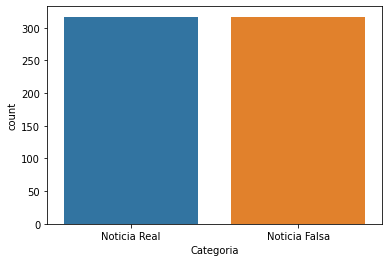

In [ ]:
# Distribución de noticias falsas y verdaderas Corpus del contexto politico colombiano
ax = sns.countplot(x="Categoria", data=df_base_cp)

### Word Cloud Real News Corpus del contexto politico colombiano

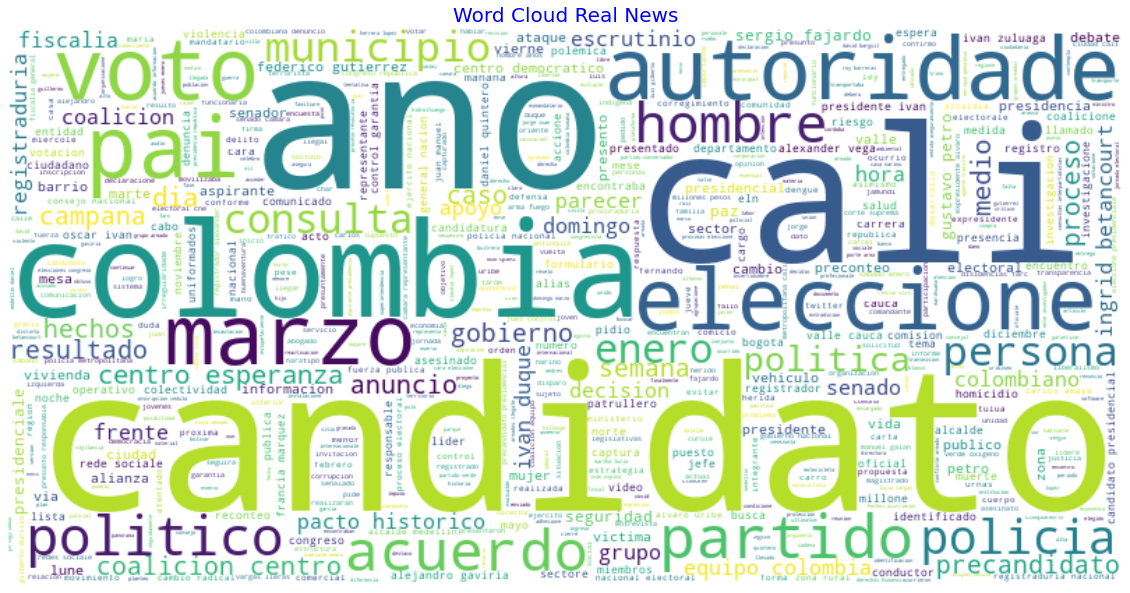

In [ ]:
#Wordcloud Noticias reales
wc = WordCloud(background_color="white", max_words=3000, width=800, height=400,stopwords=stoplist)
wc.generate(' '.join(real_news_cp['Processed_Text']))
plt.figure(figsize=(20, 15))
plt.title("Word Cloud Real News", fontsize=20,color='blue')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud Fake News Corpus del contexto politico colombiano

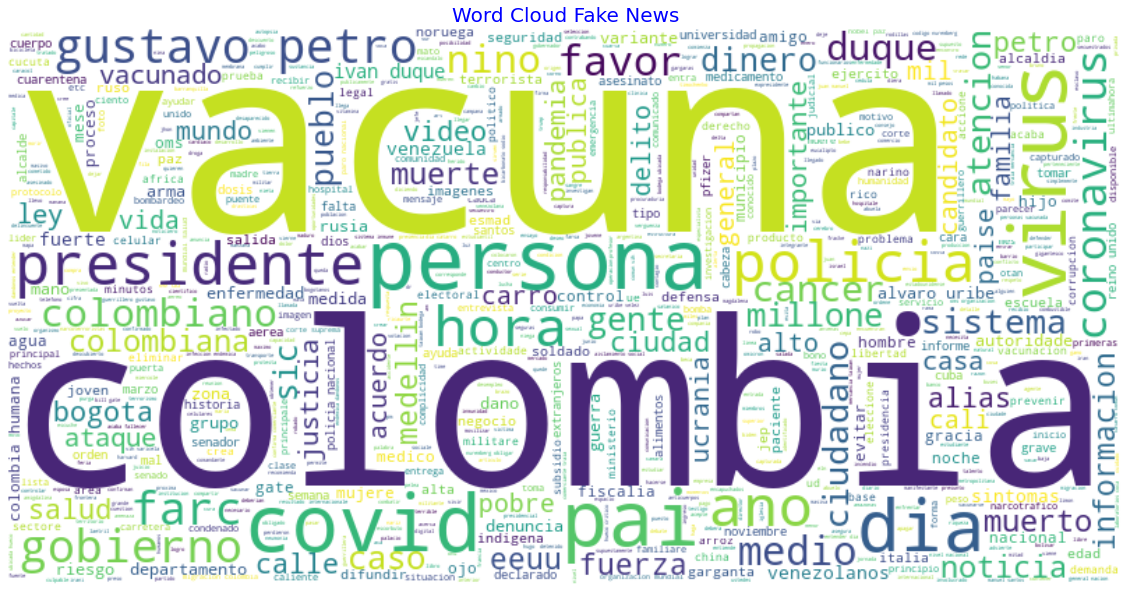

In [ ]:
#Wordcloud noticias falsas
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400,stopwords=stoplist)
wc.generate(' '.join(fake_news_cp['Processed_Text']))
plt.figure(figsize=(20, 15))
plt.title("Word Cloud Fake News", fontsize=20,color='blue')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Analitica Corpus Combinado**

###**Histograma de categorias**

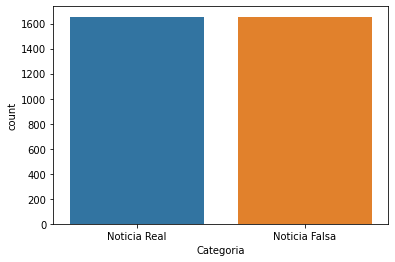

In [ ]:
# Distribución de noticias falsas y verdaderas Corpus combinado
ax = sns.countplot(x="Categoria", data=df_merge)

### Word Cloud Fake News Corpus Combinado

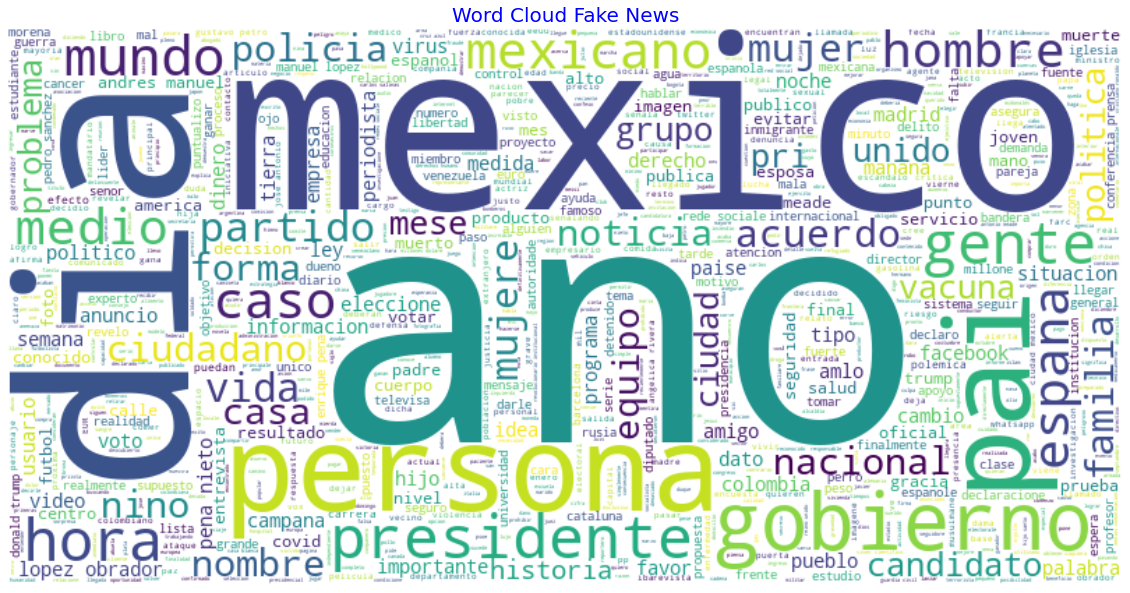

In [ ]:
#Wordcloud corpus combinado noticias falsas
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400,stopwords=stoplist)
wc.generate(' '.join(fake_news['Processed_Text']))
plt.figure(figsize=(20, 15))
plt.title("Word Cloud Fake News", fontsize=20,color='blue')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud Real News Corpus Combinado

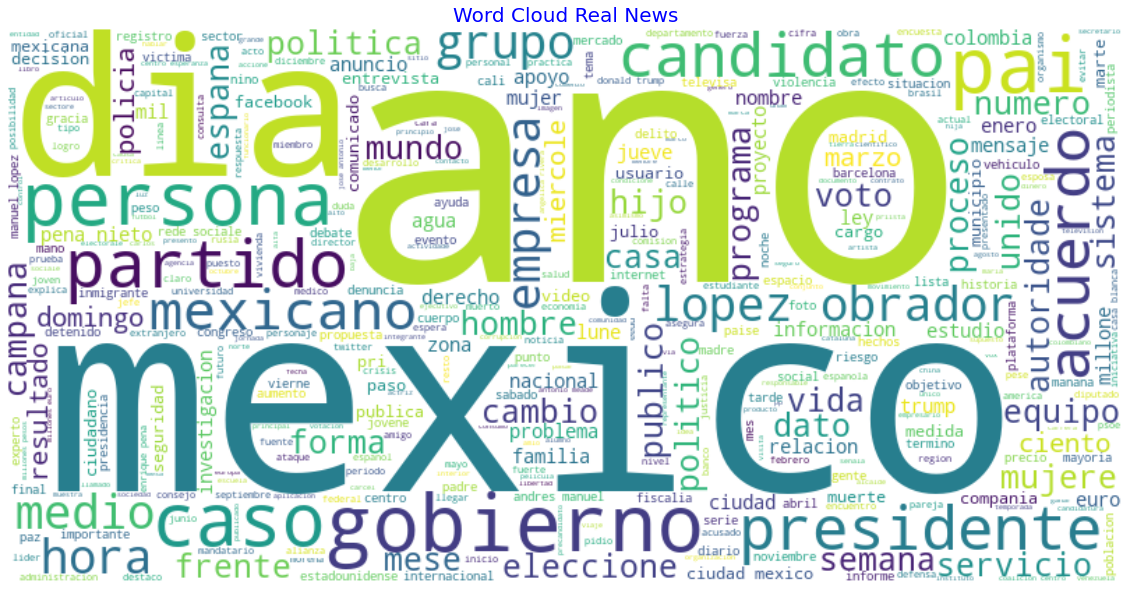

In [ ]:
#Wordcloud corpus combinado Noticias reales
wc = WordCloud(background_color="white", max_words=3000, width=800, height=400,stopwords=stoplist)
wc.generate(' '.join(real_news['Processed_Text']))
plt.figure(figsize=(20, 15))
plt.title("Word Cloud Real News", fontsize=20,color='blue')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Modelamiento**

## Codificación de etiquetas

In [ ]:
#Codificación de etiquetas
category_codes = {
     'Noticia Real': 0,
    'Noticia Falsa': 1
}

In [ ]:
# Cambio de categorias corpus combinado
df_merge['Codigo'] = df_merge['Categoria']
df_merge = df_merge.replace({'Codigo':category_codes})

In [ ]:
# Cambio de categorias Corpus del contexto politico colombiano
df_base_cp['Codigo'] = df_base_cp['Categoria']
df_base_cp = df_base_cp.replace({'Codigo':category_codes})

## División de datos

Se realiza el particionamiento de los datos en prueba y validación.

In [ ]:
#Division de datos - Corpus del contexto politico colombiano
X_train_cp, X_test_cp, y_train_cp, y_test_cp = train_test_split(df_base_cp['Processed_Text'], 
                                                    df_base_cp['Codigo'], 
                                                    test_size=0.20, 
                                                    random_state=8)

In [ ]:
#Division de datos - corpus combinado
X_train, X_test, y_train, y_test = train_test_split(df_merge['Processed_Text'], 
                                                    df_merge['Codigo'], 
                                                    test_size=0.20, 
                                                    random_state=8)

In [ ]:
y_train_cp.value_counts()

0    256
1    251
Name: Codigo, dtype: int64

In [ ]:
y_test_cp.value_counts()

1    66
0    61
Name: Codigo, dtype: int64

In [ ]:
X_train_cp

186    ojo art plan nal dilo expropiacion ahorro pens...
12     enrique penalosa denunciara claudia lopez calu...
8      canciller propone cuba agenda mutua confianza ...
545    muerto jefe informatica clinica dosis vacuna s...
84     empleados ara coma policias muertos uniformado...
                             ...                        
136    santander quilichao norte cauca revelado caso ...
133    ocurrio periodista mabel kremer visitaba centr...
361    moe advierte riesgo violencia eleccione riesgo...
340    esposa suegra hugo aguilar aceptadas victimas ...
451    ataque hombres lanzaron granada sede alcaldia ...
Name: Processed_Text, Length: 507, dtype: object

## **Representación del texto**

La representación del texto se realiza con sklearn mediante la técnica Tfidf parametrizado con unigramas y bigramas del texto

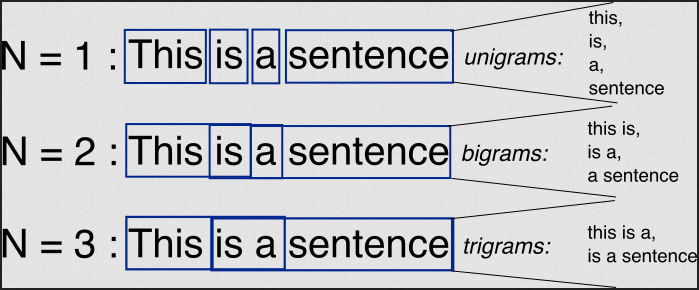

**ngram_range ** tuple (min_n, max_n) default=(1,1): Representa el limite inferior y superior para los n-grams en la extracción del texto ngram_range=(1,2) representa unigrams y bigrams a aplicarse

**max_df** parametros para ignorar terminos demasiado frecuentes que superan el umbral. ejm: max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".

**min_df** parametros para ignorar terminos no frecuentes y que superen un umbral. ejm: min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".

**max_features:** crea un vocabulario que solo tenga el top max_features ordenadas por frecuencia de términos en todo el corpus.

fuente: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


In [ ]:
# Eleccion de parametros
ngram_range = (1,3) # unigrams, bigrams, trigrams 
min_df = 0.001 # se eliminan los terminos poco frecuentes que aparezcan como minimo en el 0.1% de los documentos
max_df = 0.8 # se eliminan los terminos demasiado frecuentes que aparezcan en almenos el 80% de los documentos (similar a stopwords).
max_features = 1000 # número de features en el dataset

In [ ]:
# Codificación del texto a través de TF-IDF para el Corpus del contexto politico colombiano
features_train_cp,features_test_cp,labels_train_cp,labels_test_cp,tfidf_cp=tifdf_features(X_train_cp, X_test_cp, y_train_cp, y_test_cp,ngram_range,max_df,min_df,max_features)

In [ ]:
# Codificación del texto a través de TF-IDF para el Corpus Combinado
features_train,features_test,labels_train,labels_test,tfidf=tifdf_features(X_train, X_test, y_train, y_test,ngram_range,max_df,min_df,max_features)

In [ ]:
# verificaciones de la longitud.
print(features_train_cp.shape)
print(features_train.shape)

(507, 1000)
(2648, 1000)


In [ ]:
features_train_cp

<507x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 9051 stored elements in Compressed Sparse Row format>

In [ ]:
count_values = features_train_cp.toarray().sum(axis=0)
# list of ngrams
vocab = tfidf.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})
df_ngram


frequency bigram/trigram
0    15.395315      confianza
1    10.170229          noche
2     9.939957      anunciado
3     9.621552        partido
4     9.589122           plan
..         ...            ...
995   0.358595        planeta
996   0.327930      feminista
997   0.318223        hombres
998   0.286709     gobernador
999   0.286709          gente

[1000 rows x 2 columns]

In [ ]:
pruebasdsd=pd.DataFrame(features_train_cp.todense(), columns=tfidf_cp.get_feature_names())
pruebasdsd

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abogado     abuso  abuso sexual  acaba  acabo  accidente  acciones  \
0        0.0  0.000000      0.000000    0.0    0.0        0.0       0.0   
1        0.0  0.000000      0.000000    0.0    0.0        0.0       0.0   
2        0.0  0.000000      0.000000    0.0    0.0        0.0       0.0   
3        0.0  0.000000      0.000000    0.0    0.0        0.0       0.0   
4        0.0  0.000000      0.000000    0.0    0.0        0.0       0.0   
..       ...       ...           ...    ...    ...        ...       ...   
502      0.0  0.284254      0.284254    0.0    0.0        0.0       0.0   
503      0.0  0.000000      0.000000    0.0    0.0        0.0       0.0   
504      0.0  0.000000      0.000000    0.0    0.0        0.0       0.0   
505      0.0  0.000000      0.000000    0.0    0.0        0.0       0.0   
506      0.0  0.000000      0.000000    0.0    0.0        0.0       0.0   

     actas  acto  actual  ...  voto  votos  votos senado  vuelta  william  \
0      0.0   0.0     0.0  ...   0.0    0.0           0.0     0.0      0.0   
1      0.0   0.0     0.0  ...   0.0    0.0           0.0     0.0      0.0   
2      0.0   0.0     0.0  ...   0.0    0.0           0.0     0.0      0.0   
3      0.0   0.0     0.0  ...   0.0    0.0           0.0     0.0      0.0   
4      0.0   0.0     0.0  ...   0.0    0.0           0.0     0.0      0.0   
..     ...   ...     ...  ...   ...    ...           ...     ...      ...   
502    0.0   0.0     0.0  ...   0.0    0.0           0.0     0.0      0.0   
503    0.0   0.0     0.0  ...   0.0    0.0           0.0     0.0      0.0   
504    0.0   0.0     0.0  ...   0.0    0.0           0.0     0.0      0.0   
505    0.0   0.0     0.0  ...   0.0    0.0           0.0     0.0      0.0   
506    0.0   0.0     0.0  ...   0.0    0.0           0.0     0.0      0.0   

     yumbo      zona  zona rural     zonas  zuluaga  
0      0.0  0.000000    0.000000  0.000000      0.0  
1      0.0  0.000000    0.000000  0.000000      0.0  
2      0.0  0.000000    0.000000  0.000000      0.0  
3      0.0  0.000000    0.000000  0.000000      0.0  
4      0.0  0.000000    0.000000  0.000000      0.0  
..     ...       ...         ...       ...      ...  
502    0.0  0.000000    0.000000  0.000000      0.0  
503    0.0  0.000000    0.000000  0.000000      0.0  
504    0.0  0.000000    0.000000  0.188949      0.0  
505    0.0  0.000000    0.000000  0.000000      0.0  
506    0.0  0.164871    0.198243  0.000000      0.0  

[507 rows x 1000 columns]

In [ ]:
valores = features_train_cp.toarray()
valores.shape

(507, 1000)

In [ ]:
dfd=pd.DataFrame(valores)
dfd

0         1         2    3    4    5    6    7    8    9    ...  990  \
0    0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1    0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2    0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3    0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4    0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
..   ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
502  0.0  0.284254  0.284254  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
503  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
504  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
505  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
506  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

     991  992  993  994  995       996       997       998  999  
0    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
..   ...  ...  ...  ...  ...       ...       ...       ...  ...  
502  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
503  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
504  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.188949  0.0  
505  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
506  0.0  0.0  0.0  0.0  0.0  0.164871  0.198243  0.000000  0.0  

[507 rows x 1000 columns]

## Modelos de clasificación

Metricas de evaluación

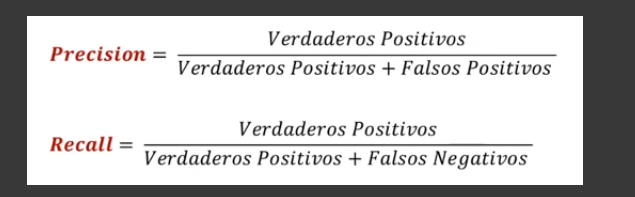

### **RandomForestClassifier**


In [ ]:
#n_estimators: Número de árboles que va a tener el bosque, normalmente cuantos más mejor. Se recomienda usar 100
#n_jobs: Número de cores que se pueden utilizar para entrenar un bosque. Cada árbol es independiente del resto
#max_features: forma de garantizar que los árboles sean diferentes, todos se entrenan con una muestra aleatoria de los datos. Podemos hacer que distintos arboles utilicen distintos atributos
#Regularización:
  #max_depth:la profundidad máxima del árbol
  #min_samples_split:número mínimo de muestras necesarias antes de dividir el nodo
  #min_samples_leaf:número mínimo de muestras que debe haber en un nodo final (hoja)
  #max_leaf_nodes:número máximo de nodos finales

#Información: https://www.iartificial.net/random-forest-bosque-aleatorio/

In [ ]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
hyperparameters_tuning = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(hyperparameters_tuning)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


#### **RandomForest Classifier - Corpus del contexto politico colombiano**

In [ ]:
%%time
# First create the base model to tune
rfc = RandomForestClassifier(random_state=rng)

# Definition of the random search
random_search_cp = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=hyperparameters_tuning,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=rng)

# Fit the random search model
random_search_cp.fit(features_train_cp, labels_train_cp)
print("Mejores hiperparametros:",random_search_cp.best_params_)
print("Accuracy hiperparametros:",random_search_cp.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparametros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}
Accuracy hiperparametros: 0.8737672583826429
CPU times: user 24.9 s, sys: 127 ms, total: 25 s
Wall time: 24.9 s


In [ ]:
# se entrena el modelo con los parametros encontrados en la busqueda aleatoria.
clf_cp = RandomForestClassifier(n_estimators=200, min_samples_split=2,min_samples_leaf=2, max_features='sqrt', max_depth=100, bootstrap=False)
clf_cp.fit(features_train_cp, labels_train_cp)
clf_predict_cp = clf_cp.predict(features_test_cp)

Text(39.49999999999999, 0.5, 'Predicted')

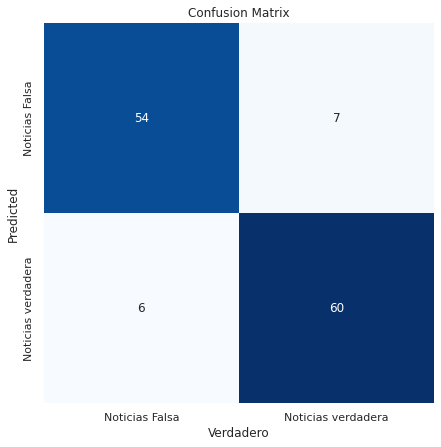

In [ ]:
# Matrix de confunsión Corpus del contexto politico colombiano
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Noticias Falsa','Noticias verdadera']
matrix=confusion_matrix(labels_test_cp, clf_predict_cp)
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Verdadero")
plt.ylabel("Predicted")

In [ ]:
accuracy_randomforest_cp=accuracy_score(labels_test_cp, clf_predict_cp)
print("Accuracy Corpus propio",accuracy_randomforest_cp)

Accuracy Corpus propio 0.8976377952755905


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


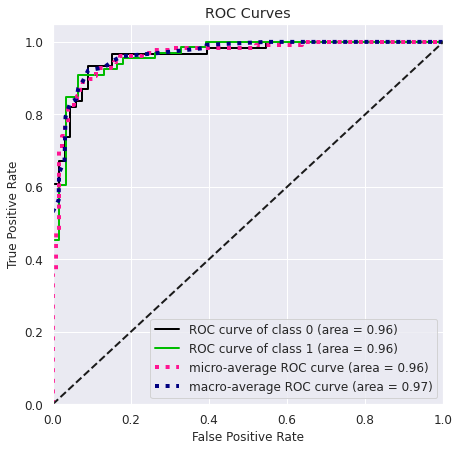

In [ ]:
clf_predict_proba_cp = clf_cp.predict_proba(features_test_cp)
skplt.metrics.plot_roc_curve(labels_test_cp, clf_predict_proba_cp)
plt.show()

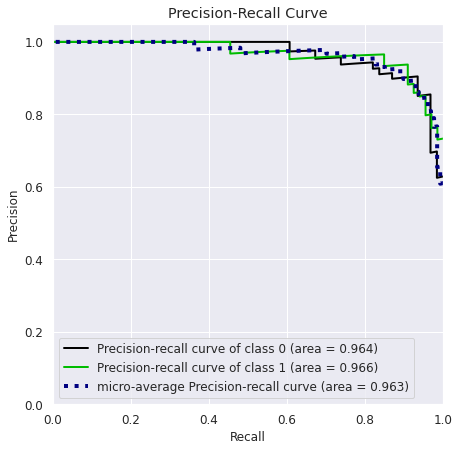

In [ ]:
skplt.metrics.plot_precision_recall(labels_test_cp,clf_predict_proba_cp)

#### **RandomForest Classifier - Corpus Combinado**

In [ ]:
%%time
# First create the base model to tune
rfc = RandomForestClassifier(random_state=rng)
# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=hyperparameters_tuning,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=rng)

# Fit the random search model
random_search.fit(features_train, labels_train)
print("Mejores hiperparametros:",random_search.best_params_)
print("Accuracy hiperparametros:",random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparametros: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
Accuracy hiperparametros: 0.6952510210073711
CPU times: user 1min 35s, sys: 288 ms, total: 1min 36s
Wall time: 1min 35s


In [ ]:
# se entrena el modelo con los parametros encontrados en la busqueda aleatoria.
clf = RandomForestClassifier(n_estimators=600, min_samples_split=5,min_samples_leaf=1, max_features='auto', max_depth=100, bootstrap=False)
clf.fit(features_train, labels_train)
clf_predict = clf.predict(features_test)

Text(39.49999999999999, 0.5, 'Predicted')

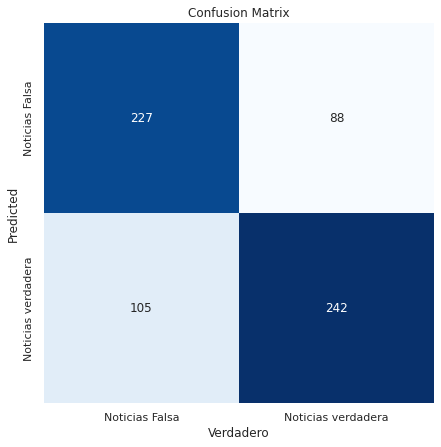

In [ ]:
# Matrix de confunsión 1000 noticias
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Noticias Falsa','Noticias verdadera']
matrix=confusion_matrix(labels_test, clf_predict)
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Verdadero")
plt.ylabel("Predicted")

In [ ]:
dataframe_graf

Noticias Falsa  Noticias verdadera
Noticias Falsa                 227                  88
Noticias verdadera             105                 242

In [ ]:
accuracy_randomforest=accuracy_score(labels_test, clf_predict)
print(accuracy_randomforest)

0.7084592145015106


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


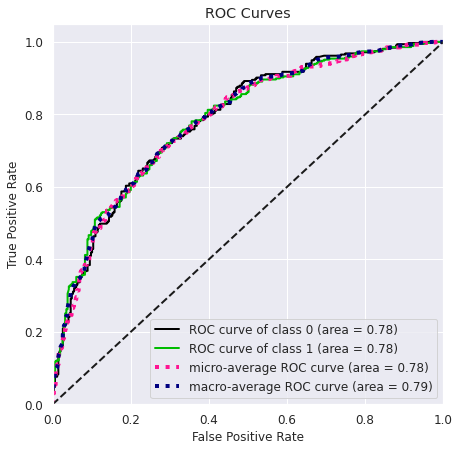

In [ ]:
clf_predict_proba = clf.predict_proba(features_test)
skplt.metrics.plot_roc_curve(labels_test, clf_predict_proba)
plt.show()

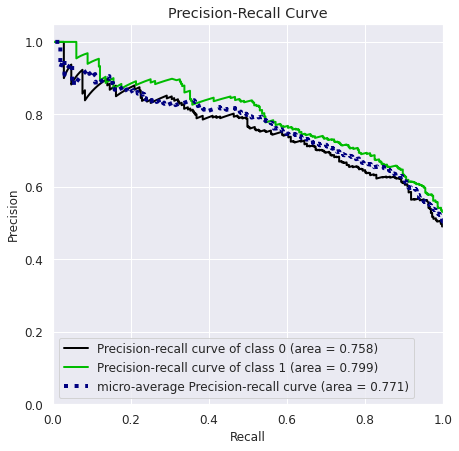

In [ ]:
skplt.metrics.plot_precision_recall(labels_test,clf_predict_proba)

## **Naive Bayes**

### **Naive Bayes Corpus del contexto politico colombiano**

In [ ]:
#Multinomial:usado en clasificación de texto
#alpha:
#fit_prior:Si requiere aprender las probabilidades previas de la clase o no

In [ ]:
%%time
hyperparameters_tuning ={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001),'fit_prior' : [True, False]}
best_model_nb_cp,predictions_nb_cp,accuracy_nb_cp=randomsearchmodels(MultinomialNB(),hyperparameters_tuning,features_train_cp,labels_train_cp,features_test_cp,labels_test_cp)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 66.3 ms, sys: 2.01 ms, total: 68.3 ms
Wall time: 67.5 ms


In [ ]:
MultinomialNB().get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [ ]:
print("Naive Bayes Accuracy Score -> ",accuracy_nb_cp)
print("Mejores hiperparametros NB:",best_model_nb_cp.best_params_)

Naive Bayes Accuracy Score ->  0.905511811023622
Mejores hiperparametros NB: {'fit_prior': True, 'alpha': 1}


Text(39.49999999999999, 0.5, 'Predicted')

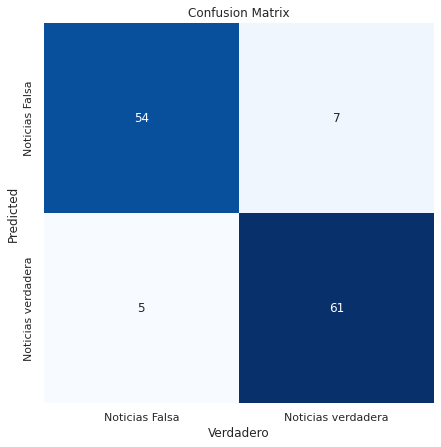

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Noticias Falsa','Noticias verdadera']
matrix=confusion_matrix(labels_test_cp, predictions_nb_cp)
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Verdadero")
plt.ylabel("Predicted")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


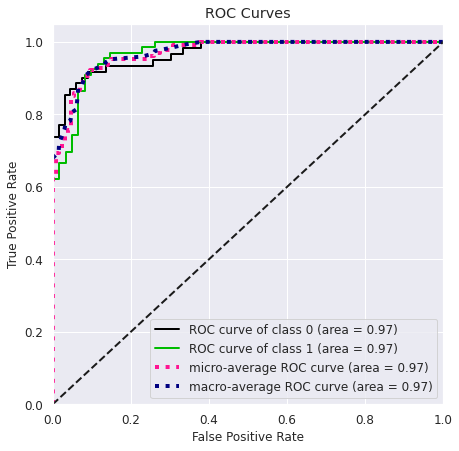

In [ ]:
predict_nb_cp=best_model_nb_cp.predict_proba(features_test_cp)
skplt.metrics.plot_roc_curve(labels_test_cp, predict_nb_cp)
plt.show()

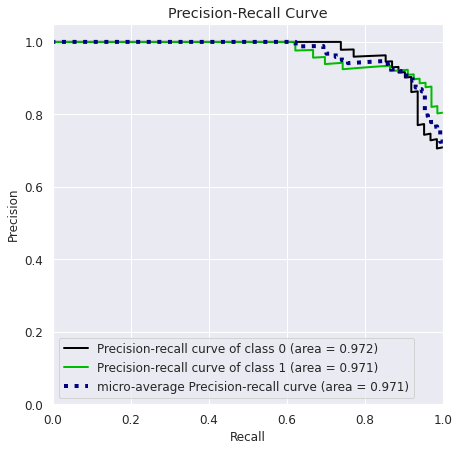

In [ ]:
skplt.metrics.plot_precision_recall(labels_test_cp,predict_nb_cp)

### **Naive Bayes Corpus Combinado**

In [ ]:
%%time
hyperparameters_tuning ={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001),'fit_prior' : [True, False]}
best_model_nb,predictions_nb,accuracy_nb=randomsearchmodels(MultinomialNB(),hyperparameters_tuning,features_train,labels_train,features_test,labels_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 83.1 ms, sys: 0 ns, total: 83.1 ms
Wall time: 82.3 ms


In [ ]:
print("Naive Bayes Accuracy Score -> ",accuracy_nb)
print("Mejores hiperparametros NB:",best_model_nb.best_params_)

Naive Bayes Accuracy Score ->  0.6993957703927492
Mejores hiperparametros NB: {'fit_prior': False, 'alpha': 1}


Text(39.49999999999999, 0.5, 'Predicted')

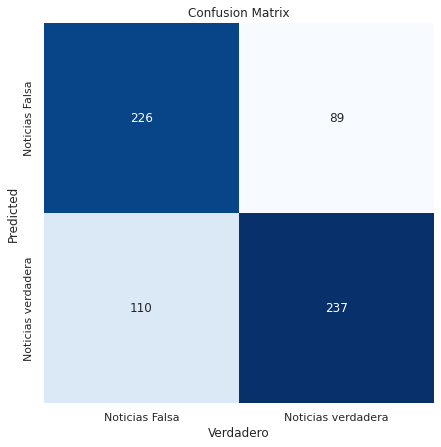

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Noticias Falsa','Noticias verdadera']
matrix=confusion_matrix(labels_test, predictions_nb)
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Verdadero")
plt.ylabel("Predicted")

In [ ]:
dataframe_graf

Noticias Falsa  Noticias verdadera
Noticias Falsa                 226                  89
Noticias verdadera             110                 237

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


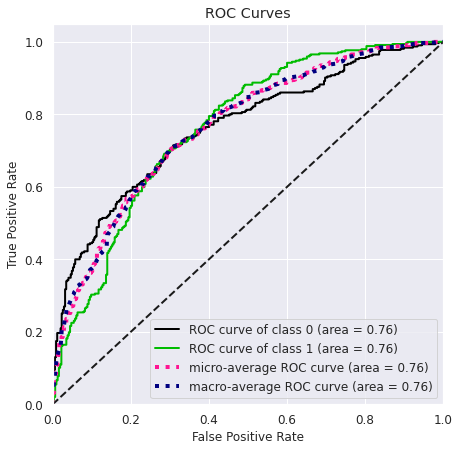

In [ ]:
predict_nb=best_model_nb.predict_proba(features_test)
skplt.metrics.plot_roc_curve(labels_test, predict_nb)
plt.show()

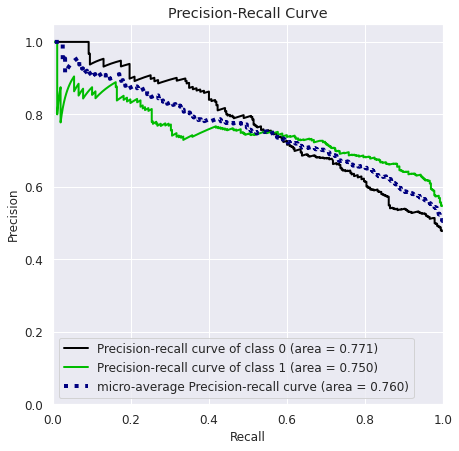

In [ ]:
skplt.metrics.plot_precision_recall(labels_test,predict_nb)

## **SVC**

### **SVC Corpus del contexto politico colombiano**

In [ ]:
#C:controla el número y severidad de las violaciones del margen (y del hiperplano) que se toleran en el proceso de ajuste - C=∞ , no se permite ninguna violación del margen  - C  se aproxima a cero, menos se penalizan los errores y más observaciones pueden estar en el lado incorrecto del margen o incluso del hiperplano
#gamma: solo se utiliza para rbf - decide cuánta curvatura queremos en un límite de decisión
#kernel: funcion que devuelve el producto escalar entre dos vectores en nuevo espacio multidimencional distinto - Truco kernel 
#https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

In [ ]:
%%time
hyperparameters_tuning = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf','sigmoid']}
best_model_svc_cp,predictions_svc_cp,accuracy_svc_cp=randomsearchmodels(SVC(probability=True),hyperparameters_tuning,features_train_cp,labels_train_cp,features_test_cp,labels_test_cp)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 3.24 s, sys: 4.9 ms, total: 3.24 s
Wall time: 3.22 s


In [ ]:
print("SVM Accuracy Score -> ",accuracy_svc_cp)
print("Mejores hiperparametros SVM:",best_model_svc_cp.best_params_)

SVM Accuracy Score ->  0.9133858267716536
Mejores hiperparametros SVM: {'kernel': 'rbf', 'gamma': 1, 'C': 100}


Text(39.49999999999999, 0.5, 'Predicted')

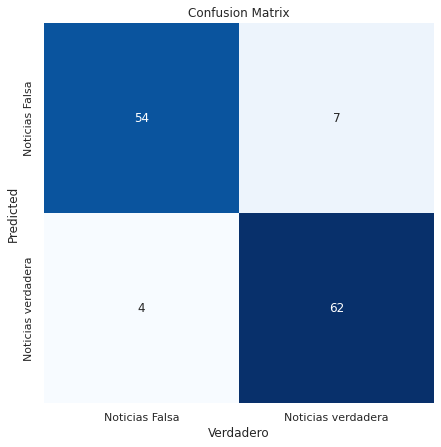

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Noticias Falsa','Noticias verdadera']
matrix=confusion_matrix(labels_test_cp, predictions_svc_cp)
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Verdadero")
plt.ylabel("Predicted")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


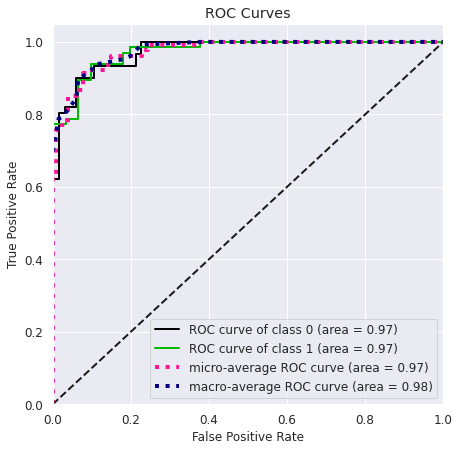

In [ ]:
predict_svc_cp=best_model_svc_cp.predict_proba(features_test_cp)
skplt.metrics.plot_roc_curve(labels_test_cp, predict_svc_cp)
plt.show()

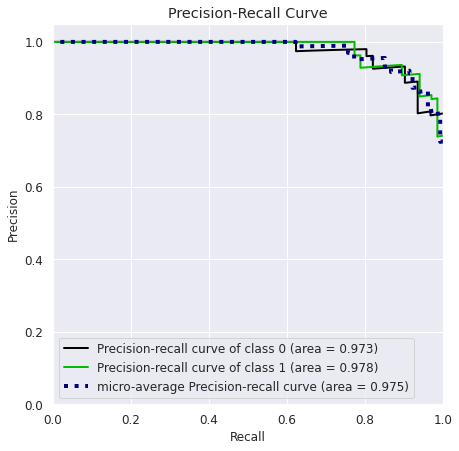

In [ ]:
skplt.metrics.plot_precision_recall(labels_test_cp,predict_svc_cp)

### **SVC Corpus Combinado**

In [ ]:
%%time
hyperparameters_tuning = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf','sigmoid']}
best_model_svc,predictions_svc,accuracy_svc=randomsearchmodels(SVC(probability=True),hyperparameters_tuning,features_train,labels_train,features_test,labels_test)                                       

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 1min 4s, sys: 82.1 ms, total: 1min 5s
Wall time: 1min 4s


In [ ]:
print("SVM Accuracy Score -> ",accuracy_svc)
print("Mejores hiperparametros SVM:",best_model_svc.best_params_)

SVM Accuracy Score ->  0.7371601208459214
Mejores hiperparametros SVM: {'kernel': 'rbf', 'gamma': 1, 'C': 100}


Text(39.49999999999999, 0.5, 'Predicted')

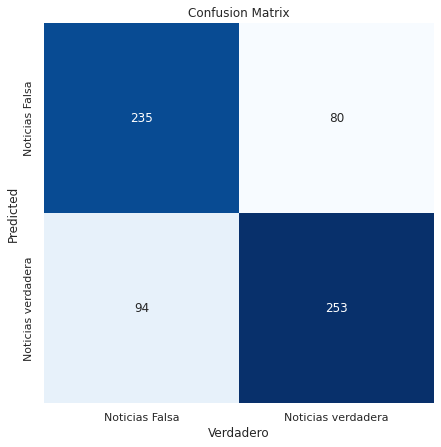

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Noticias Falsa','Noticias verdadera']
matrix=confusion_matrix(labels_test, predictions_svc)
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Verdadero")
plt.ylabel("Predicted")

In [ ]:
dataframe_graf

Noticias Falsa  Noticias verdadera
Noticias Falsa                 235                  80
Noticias verdadera              94                 253

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


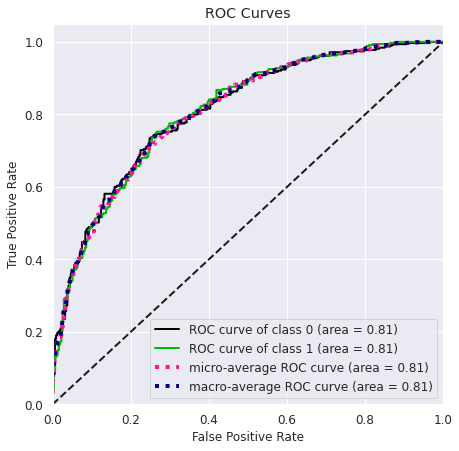

In [ ]:
predict_svc=best_model_svc.predict_proba(features_test)
skplt.metrics.plot_roc_curve(labels_test, predict_svc)
plt.show()

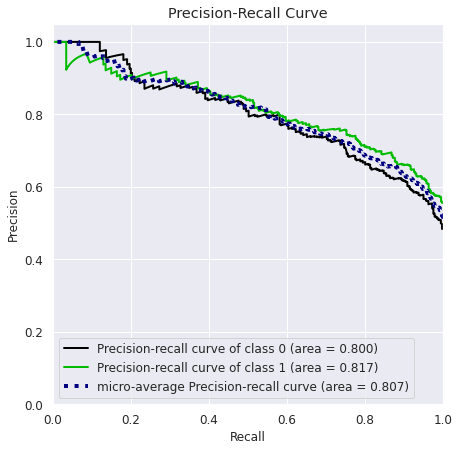

In [ ]:
skplt.metrics.plot_precision_recall(labels_test,predict_svc)

## **Logistic Regression**

### **Logistic Regression Corpus del contexto politico colombiano**

In [ ]:
#C:un parámetro que aplica regularización con el objetivo de reducir el overfitting, cuanto más pequeño es el valor, mayor es la regularización.
#Penalty:L1: hace que algunas β sean 0. Es una forma de forzar la selección de variable - L2: también conocida como Ridge, lo que hace es estimar β pequeños, sirve para controlar el sobre ajuste

In [ ]:
%%time
hyperparameters_tuning = {'C':np.logspace(-2,1,100),'penalty':['l2']}
best_model_logistic_cp,predictions_logistic_cp,accuracy_logistic_cp=randomsearchmodels(LogisticRegression(class_weight='balanced'),hyperparameters_tuning,features_train_cp,labels_train_cp,features_test_cp,labels_test_cp)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 235 ms, sys: 25 µs, total: 235 ms
Wall time: 237 ms


In [ ]:
print("Logistic Regression Accuracy Score -> ",accuracy_logistic_cp)
print("Mejores hiperparametros LR:",best_model_logistic_cp.best_params_)

Logistic Regression Accuracy Score ->  0.905511811023622
Mejores hiperparametros LR: {'penalty': 'l2', 'C': 10.0}


Text(39.49999999999999, 0.5, 'Predicted')

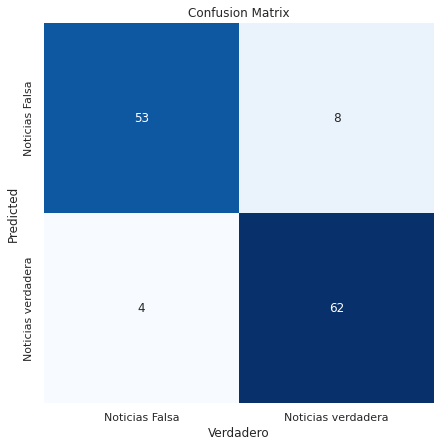

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Noticias Falsa','Noticias verdadera']
matrix=confusion_matrix(labels_test_cp, predictions_logistic_cp)
# crear dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# crear headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Verdadero")
plt.ylabel("Predicted")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


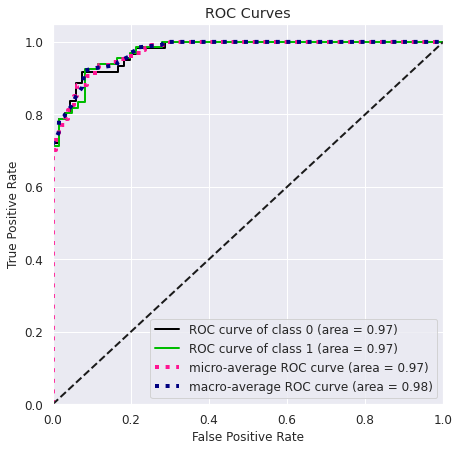

In [ ]:
y_pred_proba_cp= best_model_logistic_cp.predict_proba(features_test_cp)
skplt.metrics.plot_roc_curve(labels_test_cp,y_pred_proba_cp)
plt.show()

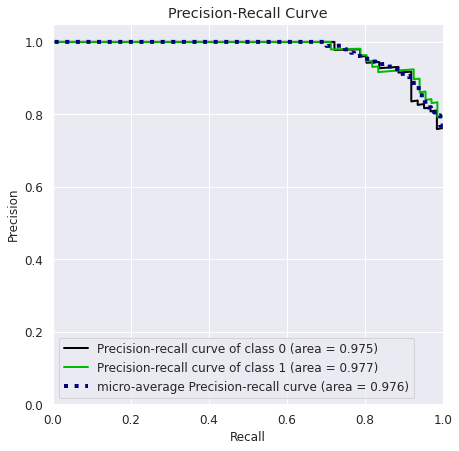

In [ ]:
skplt.metrics.plot_precision_recall(labels_test_cp,y_pred_proba_cp)

### **Logistic Regression Corpus Combinado**

In [ ]:
%%time
hyperparameters_tuning = {'C':np.logspace(-2,1,100),'penalty':['l2']}
best_model_logistic,predictions_logistic,accuracy_logistic=randomsearchmodels(LogisticRegression(class_weight='balanced'),hyperparameters_tuning,features_train,labels_train,features_test,labels_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 531 ms, sys: 6.08 ms, total: 537 ms
Wall time: 530 ms


In [ ]:
print("Logistic Regression Accuracy Score -> ",accuracy_logistic)
print("Mejores hiperparametros LR:",best_model_logistic.best_params_)

Logistic Regression Accuracy Score ->  0.7280966767371602
Mejores hiperparametros LR: {'penalty': 'l2', 'C': 0.7564633275546291}


Text(39.49999999999999, 0.5, 'Predicted')

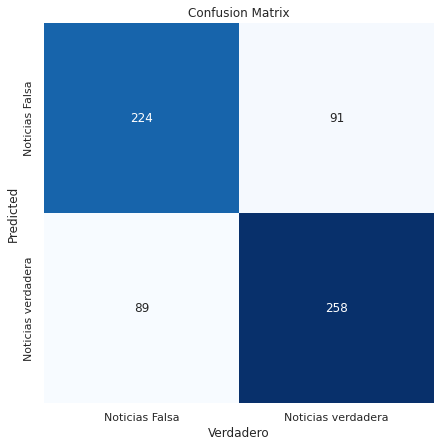

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Noticias Falsa','Noticias verdadera']
matrix=confusion_matrix(labels_test, predictions_logistic)
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Verdadero")
plt.ylabel("Predicted")

In [ ]:
dataframe_graf

Noticias Falsa  Noticias verdadera
Noticias Falsa                 224                  91
Noticias verdadera              89                 258

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


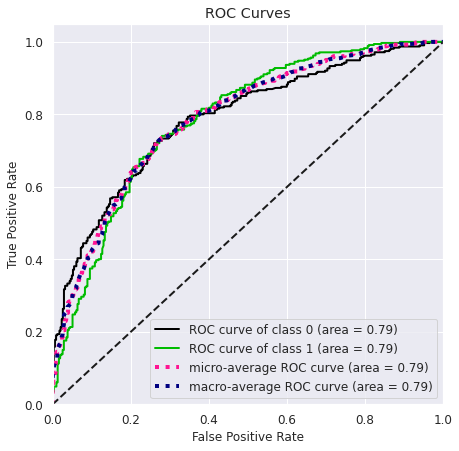

In [ ]:
y_pred_proba= best_model_logistic.predict_proba(features_test)
skplt.metrics.plot_roc_curve(labels_test,y_pred_proba)
plt.show()

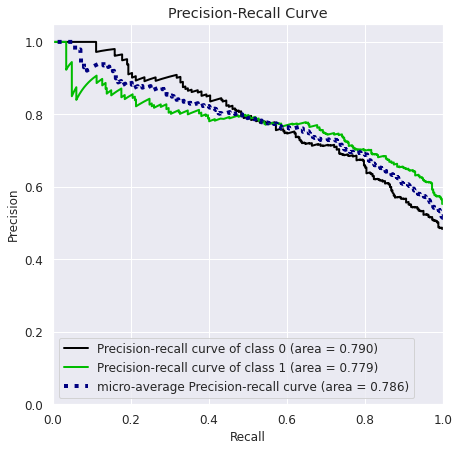

In [ ]:
skplt.metrics.plot_precision_recall(labels_test,y_pred_proba)

## **XGBoost**

### **XGBoost Corpus del contexto politico colombiano**

In [ ]:
#colsample_bytree:
#gamma:Reducción de pérdida mínima necesaria para realizar una partición adicional en un nodo de hoja del árbol. Cuanto mayor gammasea, más conservador será el algoritmo.
#min_child_weight:la suma mínima de peso de instancia necesaria en un hijo. Mantenerlo alto evita que el hijo sea demasiado específico y, por lo tanto, ayuda a evitar un ajuste excesivo
#scale_pos_weight:Controla el balance de pesos positivos y negativos, útil para clases desbalanceadas. Un valor típico a considerar:
#subsample:proporción de observaciones utilizadas para el ajsute de cada árbol. Si su valor es inferior a 1, se está aplicando Stochastic Gradient Boosting
#n_estimators:número de árboles incluidos en el modelo
#max_depth:Profundidad o número de nodos de los árboles de decisión usados en el entrenamiento. A mayor profundidad puede devolver mejores resultados, pero puede resultar en overfitting
#reg_alpha: Término de regularización L1 sobre pesos. Aumentar este valor hará que el modelo sea más conservador
#eta_vals:
#learning rate: Que tán rápido aprende el modelo y sirve para controlar el overfitting.
#colsample_bytree: Porcentaje de caracteristicas utilizadas por árbol.

In [ ]:
%%time
hyperparameters_tuning={'colsample_bytree' : [0.3, 0.5, 1.0],'gamma' : [0.1, 1, 1.5],'learning_rate' : [0.1, 0.01, 0.05,0.9],'min_child_weight' : [1, 5, 10],'scale_pos_weight' : [1, 2, 4],'subsample' : [0.8, 0.9, 1.0],'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],'max_depth' : [3,5,7,9],'reg_alpha':[0.1, 0.01, 0.05],'eta_vals': [0.001, 0.01, 0.1]}
best_model_xgb_cp,predictions_xgb_cp,accuracy_xgb_cp=randomsearchmodels(xgb.XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42),hyperparameters_tuning,features_train_cp,labels_train_cp,features_test_cp,labels_test_cp)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 50.6 s, sys: 553 ms, total: 51.1 s
Wall time: 13.5 s


In [ ]:
print("XGBoost Accuracy Score: ",accuracy_xgb_cp)
print("Mejores hiperparametros XG:",best_model_xgb_cp.best_params_)

XGBoost Accuracy Score:  0.8740157480314961
Mejores hiperparametros XG: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_alpha': 0.1, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'eta_vals': 0.001, 'colsample_bytree': 0.5}


Text(39.49999999999999, 0.5, 'Predicted')

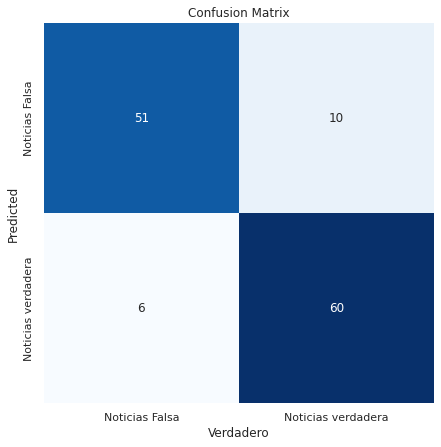

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Noticias Falsa','Noticias verdadera']
matrix=confusion_matrix(labels_test_cp, predictions_xgb_cp)
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Verdadero")
plt.ylabel("Predicted")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


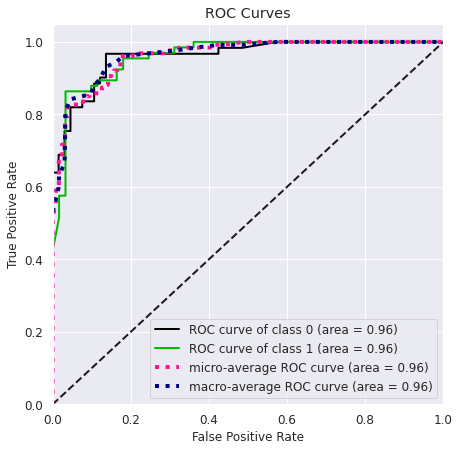

In [ ]:
y_pred_proba_cp= best_model_xgb_cp.predict_proba(features_test_cp)
skplt.metrics.plot_roc_curve(labels_test_cp,y_pred_proba_cp)
plt.show()

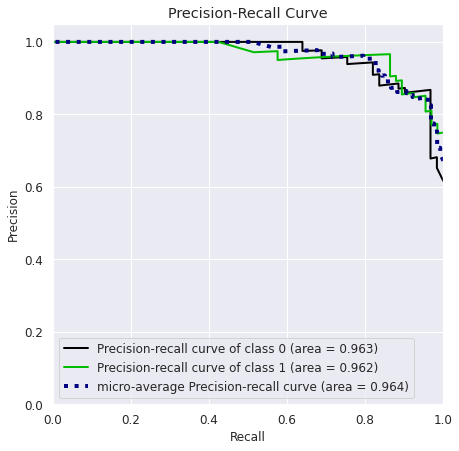

In [ ]:
skplt.metrics.plot_precision_recall(labels_test_cp,y_pred_proba_cp)

### **XGBoost Corpus Combinado**

In [ ]:
%%time
# learning rate: Que tán rápido aprende el modelo y para controlar el overfitting.
# colsample_bytree: Porcentaje de caracteristicas utilizadas por árbol.
hyperparameters_tuning={'colsample_bytree' : [0.3, 0.5, 1.0],'gamma' : [0.1, 1, 1.5],'learning_rate' : [0.1, 0.01, 0.05,0.9],'min_child_weight' : [1, 5, 10],'scale_pos_weight' : [1, 2, 4],'subsample' : [0.8, 0.9, 1.0],'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],'max_depth' : [3,5,7,9],'reg_alpha':[0.1, 0.01, 0.05],'eta_vals': [0.001, 0.01, 0.1]}
best_model_xgb,predictions_xgb,accuracy_xgb=randomsearchmodels(xgb.XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42),hyperparameters_tuning,features_train,labels_train,features_test,labels_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 1min 53s, sys: 311 ms, total: 1min 53s
Wall time: 28.6 s


In [ ]:
print("XGBoost Accuracy Score: ",accuracy_xgb)
print("Mejores hiperparametros XG:",best_model_xgb.best_params_)

XGBoost Accuracy Score:  0.7145015105740181
Mejores hiperparametros XG: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_alpha': 0.01, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1, 'eta_vals': 0.1, 'colsample_bytree': 0.3}


Text(39.49999999999999, 0.5, 'Predicted')

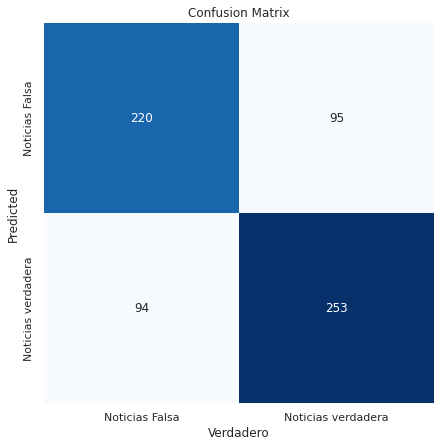

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
class_names=['Noticias Falsa','Noticias verdadera']
matrix=confusion_matrix(labels_test, predictions_xgb)
# create dataframe
dataframe_graf=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe_graf, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Verdadero")
plt.ylabel("Predicted")

In [ ]:
dataframe_graf

Noticias Falsa  Noticias verdadera
Noticias Falsa                 220                  95
Noticias verdadera              94                 253

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


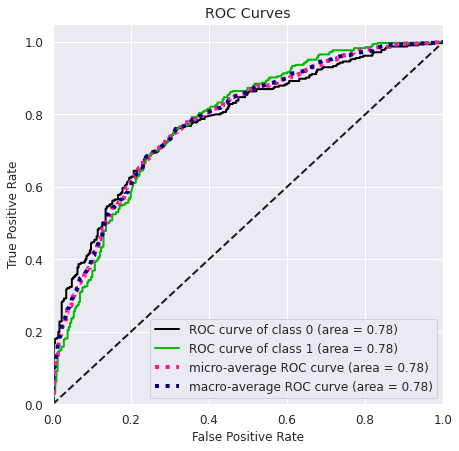

In [ ]:
y_pred_proba= best_model_xgb.predict_proba(features_test)
skplt.metrics.plot_roc_curve(labels_test,y_pred_proba)
plt.show()

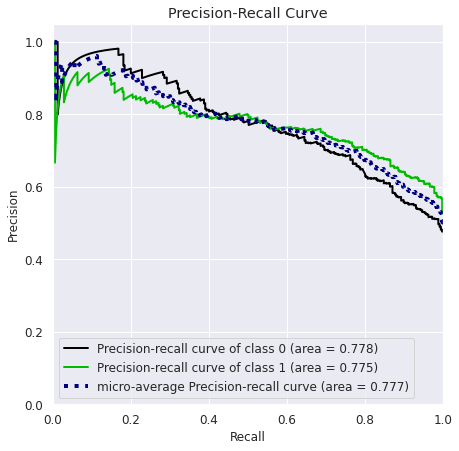

In [ ]:
skplt.metrics.plot_precision_recall(labels_test,y_pred_proba)

## **Redes Neuronales**

### **Red Neuronal Corpus del contexto politico colombiano**

In [ ]:
# crear modelo
#features_train_cp.shape[1] representa el numero de columnas de los datos de entrenamiento.
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(12, input_dim=features_train_cp.shape[1], activation='relu'))
model.add(Dense(128 , activation='relu' ))
model.add(Dense(64 , activation='relu' ))
model.add(Dense(64 , activation='relu' ))
model.add(Dense(32 , activation='relu' ))
model.add(Dense(32 , activation='relu' ))
model.add(Dense(8 , activation='relu' ))
model.add(Dense(1 , activation='sigmoid' ))

In [ ]:
# Compile model
# https://keras.io/api/optimizers/adam/
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [ ]:
print(features_train_cp.shape)
print(features_test_cp.shape)
print(type(features_train_cp))
print(type(labels_test_cp))
print((features_train_cp.shape[1]))

(507, 1000)
(127, 1000)
<class 'scipy.sparse.csr.csr_matrix'>
<class 'pandas.core.series.Series'>
1000


In [ ]:
# Separación datos de entreanmiento y datos de validación
dataxTrain=features_train_cp[100:,:]
datayTrain=labels_train_cp[100:]

DataxVal=features_train_cp[:100,:]
DatayVal=labels_train_cp[:100]

print(dataxTrain.shape)
print(datayTrain.shape)
print(DataxVal.shape)
print(DatayVal.shape)

(407, 1000)
(407,)
(100, 1000)
(100,)


In [ ]:
X_train_nn_cp=dataxTrain.toarray()
y_train_nn_cp=datayTrain.to_numpy()
X_val_nn_cp=DataxVal.toarray()
y_val_nn_cp=DatayVal.to_numpy()  

In [ ]:
print(X_train_nn_cp.shape)
print(y_train_nn_cp.shape)
print(X_val_nn_cp.shape)
print(y_val_nn_cp.shape)

(407, 1000)
(407,)
(100, 1000)
(100,)


In [ ]:
%%time
# Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
entrenamiento=model.fit(x= X_train_nn_cp, 
                        y=y_train_nn_cp,
                        validation_data=(X_val_nn_cp,
                                         y_val_nn_cp),
                        batch_size=32,
                        callbacks=[callback],
                        epochs=200,
                        verbose=1)

Epoch 1/200
13/13 [==============================] - 4s 42ms/step - loss: 0.6932 - accuracy: 0.4914 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.6216 - val_loss: 0.6862 - val_accuracy: 0.7000
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6612 - accuracy: 0.8624 - val_loss: 0.6355 - val_accuracy: 0.8200
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5069 - accuracy: 0.9386 - val_loss: 0.4285 - val_accuracy: 0.8800
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1911 - accuracy: 0.9754 - val_loss: 0.2341 - val_accuracy: 0.9100
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9926 - val_loss: 0.2096 - val_accuracy: 0.9000
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.9975 - val_loss: 0.2581 - val_accuracy: 0.9000
Epoch 8/200


In [ ]:
#X_train_cp, X_test_cp, y_train_cp, y_test_cp 
loss, accuracy_nncp = model.evaluate(features_test_cp.toarray(), labels_test_cp.to_numpy())

4/4 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.9134


In [ ]:
prediccion=model.predict(features_test_cp.toarray())

In [ ]:
# Para sacar la matriz de confusión:
y_predict=(prediccion>0.5)
confusion_matrix(labels_test_cp,y_predict)

array([[52,  9],
       [ 2, 64]])

In [ ]:
print(labels_test_cp.shape)
print(labels_test_cp.shape)

(127,)
(127,)


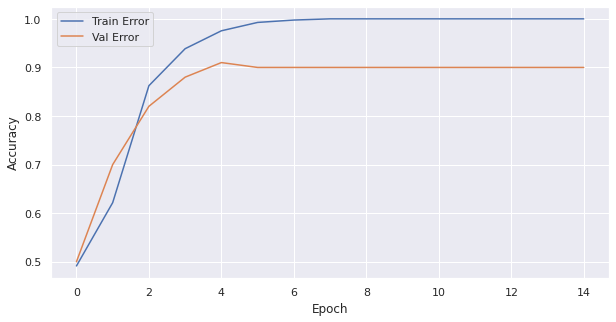

In [ ]:
## grafica de la evolución de la funcion de perdida
def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch
  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'], label="Val Error")
  plt.legend()
  plt.show()

plot_history(entrenamiento)

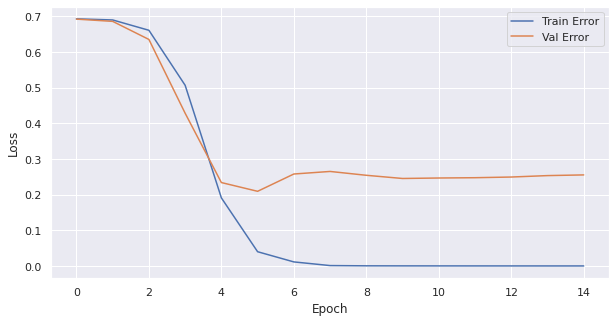

In [ ]:
## grafica de la evolución de la funcion de perdida
def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch
  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'], label="Val Error")
  plt.legend()
  plt.show()

plot_history(entrenamiento)

### **Red Neuronal Corpus Combinado**

In [ ]:
# create model
#features_train_cp.shape[1] representa el numero de columnas de los datos de entrenamiento.
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(12, input_dim=features_train.shape[1], activation='relu'))
model.add(Dense(128 , activation='relu' ))
model.add(Dense(64 , activation='relu' ))
model.add(Dense(64 , activation='relu' ))
model.add(Dense(32 , activation='relu' ))
model.add(Dense(32 , activation='relu' ))
model.add(Dense(8 , activation='relu' ))
model.add(Dense(1 , activation='sigmoid' ))

In [ ]:
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [ ]:
DataxVal=features_train[:529,:]
DatayVal=labels_train[:529]

dataxTrain=features_train[529:,:]
datayTrain=labels_train[529:]

print(dataxTrain.shape)
print(datayTrain.shape)
print(DataxVal.shape)
print(DatayVal.shape)

(2119, 1000)
(2119,)
(529, 1000)
(529,)


In [ ]:
X_train_nn_cp=dataxTrain.toarray()
y_train_nn_cp=datayTrain.to_numpy()
X_val_nn_cp=DataxVal.toarray()
y_val_nn_cp=DatayVal.to_numpy()  

In [ ]:
print(X_train_nn_cp.shape)
print(y_train_nn_cp.shape)
print(X_val_nn_cp.shape)
print(y_val_nn_cp.shape)

(2119, 1000)
(2119,)
(529, 1000)
(529,)


In [ ]:
%%time
# Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
entrenamiento=model.fit(x= X_train_nn_cp, 
                        y=y_train_nn_cp,
                        validation_data=(X_val_nn_cp,
                                         y_val_nn_cp),
                        batch_size=32,
                        callbacks=[callback],
                        epochs=200,
                        verbose=1)

Epoch 1/200
67/67 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6902 - val_accuracy: 0.5312
Epoch 2/200
67/67 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6630 - val_loss: 0.5948 - val_accuracy: 0.6919
Epoch 3/200
67/67 [==============================] - 0s 4ms/step - loss: 0.4333 - accuracy: 0.8150 - val_loss: 0.6456 - val_accuracy: 0.6824
Epoch 4/200
67/67 [==============================] - 0s 3ms/step - loss: 0.2875 - accuracy: 0.8943 - val_loss: 0.7770 - val_accuracy: 0.6938
Epoch 5/200
67/67 [==============================] - 0s 4ms/step - loss: 0.1617 - accuracy: 0.9523 - val_loss: 0.9827 - val_accuracy: 0.6862
Epoch 6/200
67/67 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.9802 - val_loss: 1.3896 - val_accuracy: 0.6900
Epoch 7/200
67/67 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9877 - val_loss: 1.3749 - val_accuracy: 0.6900
Epoch 8/200
6

In [ ]:
loss, accuracy_cc = model.evaluate(features_test.toarray(), labels_test.to_numpy())

21/21 [==============================] - 0s 2ms/step - loss: 2.3423 - accuracy: 0.6586


In [ ]:
prediccion=model.predict(features_test.toarray())

In [ ]:
# Para sacar la matriz de confusión:
y_predict=(prediccion>0.5)
confusion_matrix(labels_test,y_predict)

array([[257,  58],
       [168, 179]])

In [ ]:
print(features_test.shape)
print(labels_test.shape)

(662, 1000)
(662,)


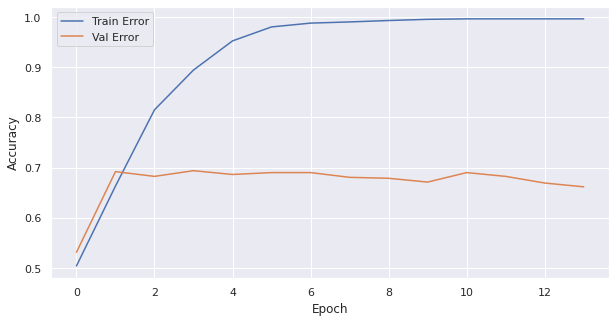

In [ ]:
## grafica de la evolución de la funcion de perdida
def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch
  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'], label="Val Error")
  plt.legend()
  plt.show()

plot_history(entrenamiento)

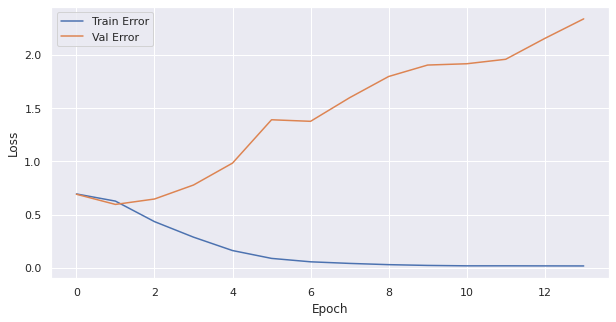

In [ ]:
## grafica de la evolución de la funcion de perdida
def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch
  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'], label="Val Error")
  plt.legend()
  plt.show()

plot_history(entrenamiento)

# **BERT**

### BERT con Corpus del contexto politico colombiano sin preprocesar



In [ ]:
# alistamiento de los datos para el entrenamiento con BERT
noticias_falsas=df_base_cp[df_base_cp['Categoria']=='Noticia Falsa']
noticias_verdaderas=df_base_cp[df_base_cp['Categoria']=='Noticia Real']

In [ ]:
new_dataframe_suffle_true=noticias_verdaderas.sample(frac=1)
new_dataframe_suffle_false=noticias_falsas.sample(frac=1)

In [ ]:
new_dataframe_suffle_true['Texto'].iloc[100]

'Enrique Peñalosa denunciará a Claudia López por calumnia La alcaldesa de Bogotá, Claudia López, será denunciada por el exmandatario Enrique Peñalosa, quien la acusa de calumnia al decir que era un evasor de impuestos y "volteador de tierras".'

In [ ]:
new_dataframe_suffle_false

Categoria                                              Texto  \
555  Noticia Falsa  GOBIERNO DE EEUU SANCIONA A SANTOS POR ESTA ES...   
416  Noticia Falsa  La acreditada y famosa institución colombiana ...   
182  Noticia Falsa  DESDE EL 1 DE MARZO LA TARIFA DE LUZ INCREMENT...   
88   Noticia Falsa  Horas antes del paro nacional, representante e...   
548  Noticia Falsa  Los guerrilleros no podrán presionar votación ...   
..             ...                                                ...   
211  Noticia Falsa   CRIMENPASIONAL , Un policía mató a su mujer y...   
322  Noticia Falsa  LA GRAN ENCUENTA nos arroja nuevos resultados ...   
511  Noticia Falsa  Al fin se destapa. ¡Extraordinario! Polonia, S...   
571  Noticia Falsa  OMS DECLARA COVID19 INFECCIÓN ENDÉMICA \nHoy, ...   
422  Noticia Falsa  Prohíben salida del País y embargan a Alvaro U...   

     longitudCaracteres                                     Processed_Text  \
555                1352  gobierno eeuu sanciona santos escandalosa noti...   
416                 217  acreditada famosa institucion colombiana sena ...   
182                 251  marzo tarifa luz incremento facebookcomtamauli...   
88                  158  horas paro nacional representante estudiantil ...   
548                 118  guerrilleros presionar votacion plebiscito arm...   
..                  ...                                                ...   
211                 448  crimenpasional policia mato mujer amante encon...   
322                 292  encuenta arroja resultados proximas elecciones...   
511                 219  destapa extraordinario polonia suecia noruega ...   
571                1012  oms declara covid infeccion endemica meses luc...   
422                  91  prohiben salida pais embargan alvaro uribe bie...   

     Codigo  
555       1  
416       1  
182       1  
88        1  
548       1  
..      ...  
211       1  
322       1  
511       1  
571       1  
422       1  

[317 rows x 5 columns]

In [ ]:
print(new_dataframe_suffle_true.shape)
print(new_dataframe_suffle_false.shape)

(317, 5)
(317, 5)


In [ ]:
test_true=new_dataframe_suffle_true.iloc[:60,:]
test_false=new_dataframe_suffle_false.iloc[:60,:]
training_true=new_dataframe_suffle_true.iloc[60:,:]
training_false=new_dataframe_suffle_false.iloc[60:,:]
print(test_true.shape)
print(test_false.shape)
print(training_true.shape)
print(training_false.shape)

(60, 5)
(60, 5)
(257, 5)
(257, 5)


In [ ]:
test_true

Categoria                                              Texto  \
337  Noticia Real  Sergio Fajardo y Carlos Amaya ya tendrían aval...   
484  Noticia Real  Una lideresa social identificada como Deisy So...   
95   Noticia Real  La ola de ataques que en los últimos meses ha ...   
120  Noticia Real  \nUn hombre fue capturado en el momento en que...   
447  Noticia Real  Comunidad aledaña a la carrilera del tren en C...   
483  Noticia Real  Colombia está a cuatro meses de votar en las u...   
142  Noticia Real  \nEl Fiscal General de la Nación, Francisco Ba...   
361  Noticia Real  MOE advierte riesgo de violencia en elecciones...   
363  Noticia Real  Denunciarán a Quintero por señalamientos de co...   
17   Noticia Real  Roy Barreras renunció a su precandidatura pres...   
290  Noticia Real   Expectativa por protagonismo femenino en elec...   
589  Noticia Real  Óscar Iván Zuluaga renunció a su candidatura y...   
253  Noticia Real  La carta donde el candidato del Centro Democrá...   
604  Noticia Real  Se cumplen 20 años del magnicidio de Monseñor ...   
104  Noticia Real  La Comisión de la Verdad rechazó el atentado t...   
34   Noticia Real  Con expresiones como “temerosas” “suspicacia” ...   
462  Noticia Real  \nLa Organización Tejido de Defensa de la Vida...   
615  Noticia Real  ¿Es viable un reconteo general de votos como l...   
117  Noticia Real  \nLa Fiscalía anunció este miércoles, 12 de en...   
608  Noticia Real  Más de 44 estaciones del MÍO fueron tomadas en...   
383  Noticia Real   Colombia acogerá las cumbres de Alianza del P...   
486  Noticia Real  Este sábado, mientras se movilizaba con su car...   
582  Noticia Real  \nLuis Gilberto Murillo será la fórmula vicepr...   
457  Noticia Real  Este miércoles, 26 de enero, se conoció que la...   
633  Noticia Real  ¿Nueva alianza? Ingrid Betancourt estaría disp...   
271  Noticia Real   Así podrá acceder a los incentivos por genera...   
115  Noticia Real  \nEn la tarde del miércoles 12 de enero, el Ej...   
388  Noticia Real   Debates de opinión, un espacio determinante d...   
5    Noticia Real  Cali: polémica por ausencia de Ospina en Conse...   
630  Noticia Real  Registrador Nacional anuncia cambios en formul...   
4    Noticia Real  ANTE LA expansión de la variante ómicron en el...   
250  Noticia Real  En una semana, Colombia hará tres cumbres inte...   
100  Noticia Real  La Policía Nacional española detuvo a un colom...   
338  Noticia Real  Cimitarra escogió a Henry Riaño como su nuevo ...   
30   Noticia Real  A solo 22 días de que el Consejo Nacional Elec...   
119  Noticia Real  \nEl secretario de seguridad y justicia de Cal...   
393  Noticia Real  Alejandro Gaviria e Íngrid Betancourt explotar...   
124  Noticia Real  Un juez envió a la cárcel a un joven de 19 año...   
586  Noticia Real  Nueva alianza a la vista: Ingrid Betancourt y ...   
374  Noticia Real   Singapur, primer Estado Asociado de la Alianz...   
627  Noticia Real  Presidente Duque firmó extradición a EEUU de l...   
0    Noticia Real  El presidente Iván Duque condenó fuertemente e...   
625  Noticia Real  Sergio Fajardo es el ganador de la Coalición C...   
605  Noticia Real  \nAutoridades del grupo de Protección Ambienta...   
133  Noticia Real  \nEl hecho ocurrió cuando la periodista Mabel ...   
463  Noticia Real  \nLa Fiscalía anunció este lunes, 24 de enero,...   
97   Noticia Real  El Centro Cibernético de la Dijín informó que ...   
581  Noticia Real  Francia Márquez sería la nueva fórmula preside...   
583  Noticia Real  Francia Márquez, la líder afro que sobrepasó a...   
109  Noticia Real  Unos hombres que vestían prendas alusivas a la...   
278  Noticia Real   Mayorquín citado a audiencia pública el 3 de ...   
454  Noticia Real  \nUn juez de control de garantías de Obando  e...   
136  Noticia Real  \nEn Santander de Quilichao, norte del Cauca, ...   
488  Noticia Real  La Registraduría Nacional informó que hay una ...   
455  Noticia Real  \nUn doloroso hecho sacude el

In [ ]:
len_noticias_falsas=len(training_false)
len_noticias_verdaderas=len(training_true)
len_noticias_falsas_test=len(test_false)
len_noticias_verdaderas_test=len(test_true)

In [ ]:
print(len(training_false))
print(len(training_true))
print(len(test_false))
print(len(test_true))

257
257
60
60


In [ ]:
training_false=training_false.reset_index(drop=True)
training_true=training_true.reset_index(drop=True)

In [ ]:
test_false=test_false.reset_index(drop=True)
test_true=test_true.reset_index(drop=True)

In [ ]:
## ver el directorio actual de trabajo
import os
print(os.getcwd())
#os.chdir(os.getcwd())

/content


In [ ]:
# para borra los directorios creados anteriormente.
#import shutil
#os.chdir('/content')
#shutil.rmtree('news')

In [ ]:
# crear  los directorios y separar las noticias de manera individual
os.makedirs('news')
os.chdir('news')
os.makedirs('train')
os.chdir('train')
os.makedirs('Noticias_falsas')
os.chdir('Noticias_falsas')
for n,i in zip(range(len_noticias_falsas), range(len_noticias_falsas)):
    with open(f'{n}.txt', 'w') as n:
            n.write(training_false['Texto'][i])

In [ ]:
os.chdir('/content')
os.chdir('news')
os.chdir('train')
os.makedirs('Noticias_verdaderas')
os.chdir('Noticias_verdaderas')
for n,i in zip(range(len_noticias_verdaderas), range(len_noticias_verdaderas)):
    with open(f'{n}.txt', 'w') as n:
            n.write(training_true['Texto'][i])
os.chdir('/content')

In [ ]:
os.chdir('/content')
os.chdir('news')
os.makedirs('test')
os.chdir('test')
os.makedirs('Noticias_falsas')
os.chdir('Noticias_falsas')
for n,i in zip(range(len_noticias_verdaderas_test), range(len_noticias_verdaderas_test)):
    with open(f'{n}.txt', 'w') as n:
            n.write(test_false['Texto'][i])
os.chdir('/content')

In [ ]:
os.chdir('/content')
os.chdir('news')
os.chdir('test')
os.makedirs('Noticias_verdaderas')
os.chdir('Noticias_verdaderas')
for n,i in zip(range(len_noticias_verdaderas_test), range(len_noticias_verdaderas_test)):
    with open(f'{n}.txt', 'w') as n:
            n.write(test_true['Texto'][i])
os.chdir('/content')

In [ ]:
## se leen las noticias utilizando las utilidades de keras
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'news/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'news/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'news/test',
    batch_size=batch_size)

label_class_names = test_ds.class_names

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 514 files belonging to 2 classes.
Using 412 files for training.
Found 514 files belonging to 2 classes.
Using 102 files for validation.
Found 120 files belonging to 2 classes.


In [ ]:
# se define la arquitectura de la red neuronal utilizando a BERT para que haga parte del modelo (Fine Tunning)
#'bert_multi_cased_L-12_H-768_A-12' 
# bert_multi_cased_preprocess/3
tf.keras.backend.clear_session()
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation='relu', name='classifier')(net)
  return tf.keras.Model(text_input, net)

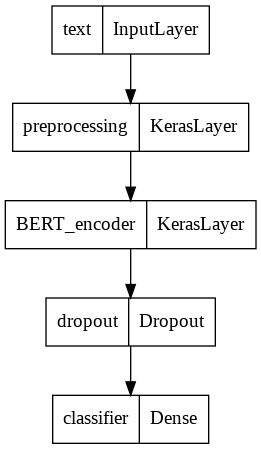

In [ ]:
classifier_model = build_classifier_model()
tf.keras.utils.plot_model(classifier_model)

In [ ]:
# definición de la funcion de perdida y la metrica a utilizar
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()
#https://keras.io/api/metrics/accuracy_metrics/

In [ ]:
# parametrización
epochs = 20
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
# compilación del modelo
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
## entrenamiento del modelo con todas la noticias.
%%time
print(f'Entrenamiento con {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs,
                               callbacks=[callback])

Entrenamiento con https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Epoch 1/20
13/13 [==============================] - 27s 688ms/step - loss: 0.6960 - binary_accuracy: 0.5170 - val_loss: 0.6351 - val_binary_accuracy: 0.6373
Epoch 2/20
13/13 [==============================] - 8s 623ms/step - loss: 0.6672 - binary_accuracy: 0.5995 - val_loss: 0.5401 - val_binary_accuracy: 0.8529
Epoch 3/20
13/13 [==============================] - 8s 621ms/step - loss: 0.4993 - binary_accuracy: 0.8981 - val_loss: 0.4706 - val_binary_accuracy: 0.9314
Epoch 4/20
13/13 [==============================] - 8s 622ms/step - loss: 0.4250 - binary_accuracy: 0.9636 - val_loss: 0.6613 - val_binary_accuracy: 0.8922
Epoch 5/20
13/13 [==============================] - 8s 623ms/step - loss: 0.4379 - binary_accuracy: 0.9563 - val_loss: 0.6569 - val_binary_accuracy: 0.9020
Epoch 6/20
13/13 [==============================] - 8s 622ms/step - loss: 0.4278 - binary_accuracy: 0.9417 - val_loss: 0.3723 - val_binar

In [ ]:
loss, accuracy = classifier_model.evaluate(test_ds)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 [==============================] - 1s 197ms/step - loss: 0.3779 - binary_accuracy: 0.9833
Loss: 0.37786802649497986
Accuracy: 0.9833333492279053


In [ ]:
prediccion=classifier_model.predict(test_ds)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


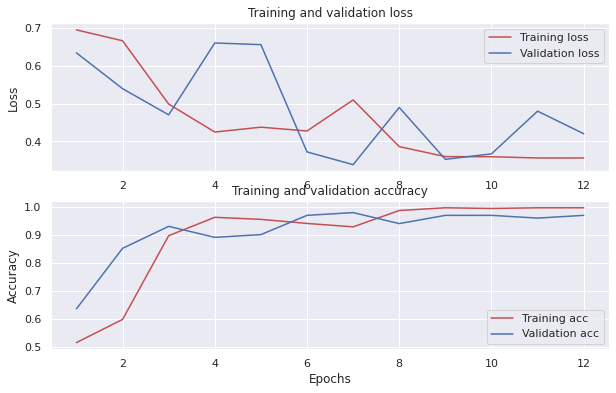

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
dataset_name = 'noticiasColombianas'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))
classifier_model.save(saved_model_path, include_optimizer=False)


INFO:tensorflow:Assets written to: ./noticiasColombianas_bert/assets


INFO:tensorflow:Assets written to: ./noticiasColombianas_bert/assets


In [ ]:
reloaded_model = tf.saved_model.load(saved_model_path)

### BERT con corpus combinado sin preprocesar



In [ ]:
# alistamiento de los datos para el entrenamiento con BERT
noticias_falsas=df_base[df_base['Categoria']=='Noticia Falsa']
noticias_verdaderas=df_base[df_base['Categoria']=='Noticia Real']

In [ ]:
new_dataframe_suffle_true=noticias_verdaderas.sample(frac=1)
new_dataframe_suffle_false=noticias_falsas.sample(frac=1)

In [ ]:
new_dataframe_suffle_true['Texto'].iloc[360]

' Joshua Harris , propietario de los Philadelpia 76ers de la NBA, se ha interesado en adquirir el paquete accionarial del Alcorcón que pertenece al empresario belga Roland Duchatelet , algo que desde el club alfarero no desmienten, aunque sí niegan que se '

In [ ]:
new_dataframe_suffle_false

Unnamed: 0      Categoria  \
634            0  Noticia Falsa   
686           52  Noticia Falsa   
2326        1016  Noticia Falsa   
234          234  Noticia Falsa   
524          524  Noticia Falsa   
...          ...            ...   
2121         811  Noticia Falsa   
2020         710  Noticia Falsa   
2331        1021  Noticia Falsa   
2179         869  Noticia Falsa   
1612         302  Noticia Falsa   

                                                  Texto  longitudCaracteres  \
634   RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...                2605   
686   Joven coahuilense convivirá con premios Nobel....                1382   
2326  Javier Maroto ya tiene destino definitivo, vol...                 255   
234   ISRAEL NO TENDRA RED 5G  \nA pesar de que Isra...                 174   
524   Mi mayor deseo es llegar al poder para continu...                 228   
...                                                 ...                 ...   
2121  El Tripartito que gobierna en el Ayuntamiento ...                 255   
2020  El Papa Francisco ha comparado a Jesucristo co...                 255   
2331  Joji, de 50 años, fue encontrado en su casa de...                 255   
2179  Enrique Area Sacristán, teniente coronel del E...                 255   
1612  Activan alerta nivel 3 Es la primera vez en Es...                 227   

                                         Processed_Text         Codigo  
634   rae incluira palabra lady diccionario idioma e...  Noticia Falsa  
686   joven coahuilense convivira premios nobel inve...  Noticia Falsa  
2326  javier maroto destino definitivo volvera rueda...  Noticia Falsa  
234   israel red g israel estrechamente involucrado ...  Noticia Falsa  
524   deseo llegar continuar legado bolivar legado h...  Noticia Falsa  
...                                                 ...            ...  
2121  tripartito gobierna ayuntamiento oviedo aprobo...  Noticia Falsa  
2020  papa francisco comparado jesucristo lider cult...  Noticia Falsa  
2331  joji anos encontrado casa japon sepultado cole...  Noticia Falsa  
2179  enrique area sacristan teniente coronel ejerci...  Noticia Falsa  
1612  activan alerta nivel espana activa pa general ...  Noticia Falsa  

[1655 rows x 6 columns]

In [ ]:
print(new_dataframe_suffle_true.shape)
print(new_dataframe_suffle_false.shape)

(1655, 6)
(1655, 6)


In [ ]:
test_true=new_dataframe_suffle_true.iloc[:331,:]
test_false=new_dataframe_suffle_false.iloc[:331,:]
training_true=new_dataframe_suffle_true.iloc[331:,:]
training_false=new_dataframe_suffle_false.iloc[331:,:]
print(test_true.shape)
print(test_false.shape)
print(training_true.shape)
print(training_false.shape)

(331, 6)
(331, 6)
(1324, 6)
(1324, 6)


In [ ]:
test_true

Unnamed: 0     Categoria  \
1362          52  Noticia Real   
2639        1329  Noticia Real   
3269        1959  Noticia Real   
2309         999  Noticia Real   
2506        1196  Noticia Real   
...          ...           ...   
1293         659  Noticia Real   
2971        1661  Noticia Real   
1570         260  Noticia Real   
749          115  Noticia Real   
1325          15  Noticia Real   

                                                  Texto  longitudCaracteres  \
1362   Cincuenta días ha tardado en llegar el primer...                 255   
2639  Los delitos sexuales tienen una tendencia crec...                 255   
3269  Cientos de personas han pasado la noche atrapa...                 252   
2309  Huawei pide a EEUU que declare inconstituciona...                  79   
2506  La Policía Nacional ha auxiliado en el puesto ...                 254   
...                                                 ...                 ...   
1293  Más de *NUMBER* mil exigen en Change.org inves...                1679   
2971  Tras ocho años en la oposición, el PSOE logró ...                 255   
1570  "Si eres un individuo preocupado, puedes tomar...                 254   
749   ¿El empleado biónico?\nUna empresa ha empezado...                3365   
1325   Gente de todas las edades -muchos jóvenes- y ...                 254   

                                         Processed_Text        Codigo  
1362  cincuenta dias tardado llegar cisma cogobierno...  Noticia Real  
2639  delitos sexuales tendencia creciente anos espe...  Noticia Real  
3269  cientos personas noche atrapadas coche protecc...  Noticia Real  
2309  huawei pide eeuu declare inconstitucional proh...  Noticia Real  
2506  policia nacional auxiliado puesto fronterizo m...  Noticia Real  
...                                                 ...           ...  
1293  mil exigen changeorg investigar angelica river...  Noticia Real  
2971  anos oposicion psoe logro recuperar gobierno m...  Noticia Real  
1570  individuo preocupado puede tomar medidas reduc...  Noticia Real  
749   empleado bionico empresa empezado implantar ch...  Noticia Real  
1325  gente edade jovenes clase sociale recibieron e...  Noticia Real  

[331 rows x 6 columns]

In [ ]:
len_noticias_falsas=len(training_false)
len_noticias_verdaderas=len(training_true)
len_noticias_falsas_test=len(test_false)
len_noticias_verdaderas_test=len(test_true)

In [ ]:
print(len(training_false))
print(len(training_true))
print(len(test_false))
print(len(test_true))

1324
1324
331
331


In [ ]:
training_false=training_false.reset_index(drop=True)
training_true=training_true.reset_index(drop=True)

In [ ]:
test_false=test_false.reset_index(drop=True)
test_true=test_true.reset_index(drop=True)

In [ ]:
## ver el directorio actual de trabajo
import os
print(os.getcwd())
#os.chdir(os.getcwd())

/content


In [ ]:
# para borra los directorios
import shutil
os.chdir('/content')
shutil.rmtree('news')

In [ ]:
# crear  los directorios y separar las noticias de manera individual
os.makedirs('news')
os.chdir('news')
os.makedirs('train')
os.chdir('train')
os.makedirs('Noticias_falsas')
os.chdir('Noticias_falsas')
for n,i in zip(range(len_noticias_falsas), range(len_noticias_falsas)):
    with open(f'{n}.txt', 'w') as n:
            n.write(training_false['Texto'][i])

In [ ]:
os.chdir('/content')
os.chdir('news')
os.chdir('train')
os.makedirs('Noticias_verdaderas')
os.chdir('Noticias_verdaderas')
for n,i in zip(range(len_noticias_verdaderas), range(len_noticias_verdaderas)):
    with open(f'{n}.txt', 'w') as n:
            n.write(training_true['Texto'][i])
os.chdir('/content')

In [ ]:
os.chdir('/content')
os.chdir('news')
os.makedirs('test')
os.chdir('test')
os.makedirs('Noticias_falsas')
os.chdir('Noticias_falsas')
for n,i in zip(range(len_noticias_verdaderas_test), range(len_noticias_verdaderas_test)):
    with open(f'{n}.txt', 'w') as n:
            n.write(test_false['Texto'][i])
os.chdir('/content')

In [ ]:
os.chdir('/content')
os.chdir('news')
os.chdir('test')
os.makedirs('Noticias_verdaderas')
os.chdir('Noticias_verdaderas')
for n,i in zip(range(len_noticias_verdaderas_test), range(len_noticias_verdaderas_test)):
    with open(f'{n}.txt', 'w') as n:
            n.write(test_true['Texto'][i])
os.chdir('/content')

In [ ]:
## se leen las noticias utilizando las utilidades de keras
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'news/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'news/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'news/test',
    batch_size=batch_size)

label_class_names = test_ds.class_names

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2648 files belonging to 2 classes.
Using 2119 files for training.
Found 2648 files belonging to 2 classes.
Using 529 files for validation.
Found 662 files belonging to 2 classes.


In [ ]:
# se define la arquitectura de la red neuronal utilizando a BERT para que haga parte del modelo (Fine Tunning)
tf.keras.backend.clear_session()
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation='relu', name='classifier')(net)
  return tf.keras.Model(text_input, net)

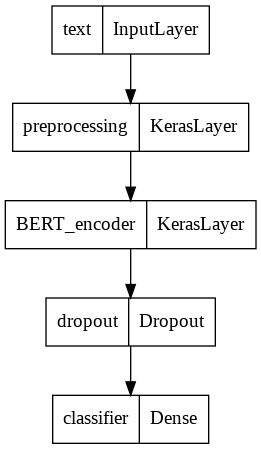

In [ ]:
classifier_model = build_classifier_model()
tf.keras.utils.plot_model(classifier_model)

In [ ]:
# definición de la funcion de perdida y la metrica a utilizar
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
# parametrización
epochs = 20
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
# compilación del modelo
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
## entrenamiento del modelo con todas la noticias.
%%time
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs,
                               callbacks=[callback])

Training model with https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Epoch 1/20
67/67 [==============================] - 62s 651ms/step - loss: 0.6703 - binary_accuracy: 0.5715 - val_loss: 0.6393 - val_binary_accuracy: 0.7335
Epoch 2/20
67/67 [==============================] - 41s 619ms/step - loss: 0.6231 - binary_accuracy: 0.7145 - val_loss: 0.6943 - val_binary_accuracy: 0.7845
Epoch 3/20
67/67 [==============================] - 41s 618ms/step - loss: 0.5684 - binary_accuracy: 0.7820 - val_loss: 0.5682 - val_binary_accuracy: 0.8034
Epoch 4/20
67/67 [==============================] - 41s 618ms/step - loss: 0.5230 - binary_accuracy: 0.8334 - val_loss: 0.9979 - val_binary_accuracy: 0.7505
Epoch 5/20
67/67 [==============================] - 41s 617ms/step - loss: 0.5304 - binary_accuracy: 0.8603 - val_loss: 0.5730 - val_binary_accuracy: 0.7372
Epoch 6/20
67/67 [==============================] - 41s 617ms/step - loss: 0.4623 - binary_accuracy: 0.8896 - val_loss: 0.6284 - va

In [ ]:
loss, accuracy = classifier_model.evaluate(test_ds)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


21/21 [==============================] - 5s 217ms/step - loss: 1.1318 - binary_accuracy: 0.7915
Loss: 1.1318086385726929
Accuracy: 0.791540801525116


In [ ]:
clasif_BERT=classifier_model.predict(test_ds)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


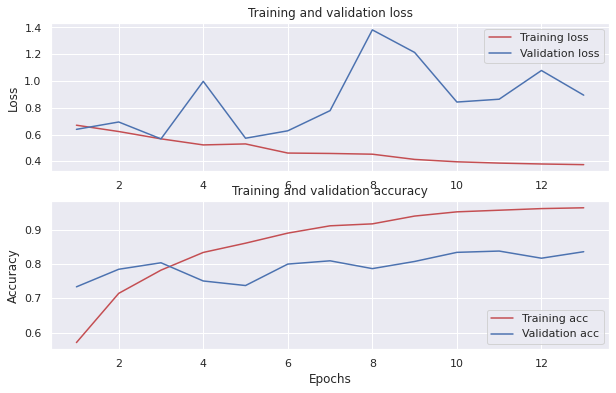

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#**Evaluación**

###**Evaluación de Modelos con Corpus del contexto politico colombiano**

In [ ]:
listas_cp=[["Random Forest",accuracy_randomforest_cp],["Naive Bayes",accuracy_nb_cp],["SVC",accuracy_svc_cp],
           ["Logistic Regression",accuracy_logistic_cp],["XGBoost",accuracy_xgb_cp],
           ["Neural Network",accuracy_nncp]]
df_listas_cp=pd.DataFrame(listas_cp,columns=["Modelos","Métrica - Accuracy"])
df_listas_cp
df_listas_cp.style.set_properties(**{'border': '1.3px solid black','text-align': 'center',
                          'color': '#FFFFFF'})

###**Evaluación de Modelos con el Corpus combinado**

In [ ]:
listas=[["Random Forest",accuracy_randomforest],["Naive Bayes",accuracy_nb],
           ["SVC",accuracy_svc],["Logistic Regression",accuracy_logistic],["XGBoost",accuracy_xgb],
         ["Neural Network",accuracy_cc]]
df_listas=pd.DataFrame(listas,columns=["Modelos","Métrica - Accuracy"])
df_listas
df_listas.style.set_properties(**{'border': '1.3px solid black','text-align': 'center',
                          'color': '#FFFFFF'})

# **Pruebas**

In [ ]:
df_news_test=classification_news_twitter("@RevistaSemana",10, clf_cp)

0it [00:00, ?it/s]

['https://t.co/m4tiQWyiqm']
['https://t.co/qI26fUfg97']
['https://t.co/6vnGDB6Y8M']
['https://t.co/Q84EhMtm7d']
['https://t.co/CIIUoJnSr2']
['https://t.co/XXvspuitX1']
['https://t.co/V06U8sKUGM']
['https://t.co/zc0wv4WXUB']
['https://t.co/G6FiZWlapM']
['https://t.co/WjpDdK8CNG']


In [ ]:
df_news_test

[('La noticia es falsa con una probabilidad de: ', 0.6163045604160111),
 ('La noticia es real con una probabilidad de: ', 0.8585400330019136),
 ('La noticia es real con una probabilidad de: ', 0.9350513224520577),
 ('La noticia es real con una probabilidad de: ', 0.6311195065899011),
 ('La noticia es real con una probabilidad de: ', 0.6017539348297339),
 ('La noticia es real con una probabilidad de: ', 0.6890609273245554),
 ('La noticia es real con una probabilidad de: ', 0.6245337012854857),
 ('La noticia es real con una probabilidad de: ', 0.6757122457697399),
 ('La noticia es real con una probabilidad de: ', 0.9416774020771783),
 ('La noticia es real con una probabilidad de: ', 0.8013318074189236)]

# Webscrapping

In [ ]:
print(webscrapping("https://www.semana.com/nacion/articulo/alias-otoniel-o-la-sonrisa-del-mal-asi-se-le-vio-al-partir-de-colombia-hacia-ee-uu/202251/?utm_term=Autofeed&utm_campaign=Echobox&utm_medium=Social&utm_source=Twitter#Echobox=1651710236"))

Solo nombrando unos cuantos datos de su prontuario criminal se puede entender la magnitud de este acontecimiento: tenía 122 órdenes vigentes de detención y dos solicitudes de extradición a EE. UU., donde ahora le espera una fuerte condena.Casi que resignado ante la suerte que le espera en los Estados Unidos y recordando los escabrosos crímenes que ordenó ejecutar, Otoniel solo atinó a sonreír, tal vez con nerviosismo, tal vez con ironía, tal vez para ocultar la vergüenza, como lo muestra el hecho de que en las imágenes aparece con la cabeza agachada, incluso en una de ellas intenta ocultar totalmente el rostro.Esta misma expresión, la de la sonrisa del mal, la tuvo también el 23 de octubre del año pasado, cuando cayó en medio de un operativo. Esposado y custodiado por la Fuerza Pública que participó de la operación militar y policial, solo atinó a sonreír, en medio de la sorpresa o, incluso, como lo dijo en ese momento el ministro de Defensa, Diego Molano, como un gesto de nerviosismo.


## Pruebas de clasificación de Tweets con BERT entrenado con noticias del contexto político colombiano.



In [ ]:
classification_news_twitter_BERT("@RevistaSemana",10)

0it [00:00, ?it/s]

['https://t.co/m4tiQWyiqm']
['https://t.co/qI26fUfg97']
['https://t.co/6vnGDB6Y8M']
['https://t.co/Q84EhMtm7d']
['https://t.co/CIIUoJnSr2']
['https://t.co/XXvspuitX1']
['https://t.co/V06U8sKUGM']
['https://t.co/zc0wv4WXUB']
['https://t.co/G6FiZWlapM']
['https://t.co/WjpDdK8CNG']


0it [00:00, ?it/s]

input: Canales de servicio al clienteHorarios de atención Lunes a viernes: 7:00 a.m. a 7:00 p.m.Sábados y domingos: 8:00 a.m. a 5:00 p.m.Todas las marcas registradas son propiedad de la compañía respectiva o de PUBLICACIONES SEMANA S.A.Se prohíbe la reproducción total o parcial de cualquiera de los contenidos que aquí aparezca, así como su traducción a cualquier idioma sin autorización escrita por su titular. : score: 0.880639
input: Aida Merlano, quien se encuentra actualmente recluida en un centro penitenciario de Venezuela, sorprendió a todos sus seguidores este martes y reveló su respaldo al candidato Gustavo Petro para la segunda vuelta presidencial, la cual se realizará el próximo domingo.“Señor Gustavo Petro, yo creo en su palabra. Dios permita que sea el próximo presidente de mi país y que, de la mano de Francia Márquez y Verónica Alcocer, le devuelva a mi gente todo lo que a lo largo de los años los intocables les han arrebatado”, precisó en Instagram.Tras estas declaraciones,

# **Modelos para producción**

### Se guardan los modelos para su paso a producción

In [ ]:
create_model_production("RF",clf_cp)
create_model_production("NB",best_model_nb)
create_model_production("SVC",best_model_svc)
create_model_production("LR",best_model_logistic)
create_model_production("Xgboost",best_model_xgb)
create_model_production("vectorizer",tfidf)
create_model_production("vectorizer_cp",tfidf_cp)